# PART - ONE

<b>DOMAIN: </b> Automobile

<b> CONTEXT: </b> A communications equipment manufacturing company has a product which is responsible for emitting informative signals. Company wants to build a
machine learning model which can help the company to predict the equipment’s signal quality using various parameters.

<b> DATA DESCRIPTION: </b> The data set contains information on various signal tests performed:
1. Parameters: Various measurable signal parameters.
2. Signal_Quality: Final signal strength or quality

<b> PROJECT OBJECTIVE: </b> The need is to build a regressor which can use these parameters to determine the signal strength or quality [as number].

<b> Steps and tasks: </b>

1. Import data

In [87]:
# imports

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from statistics import mean
import math
import pickle

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import cross_val_score

# %tensorflow_version 2.x
import tensorflow
tensorflow.__version__

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation
from tensorflow.keras import regularizers #for l2 regularization
from tensorflow.keras.optimizers import Adam   #for adam optimizer
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor 
from tensorflow.keras import backend as bk
from tensorflow.keras.models import load_model

In [88]:
data_s = pd.read_csv("Part- 1 - Signal.csv")

data_s.info(),data_s.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
Parameter 1        1599 non-null float64
Parameter 2        1599 non-null float64
Parameter 3        1599 non-null float64
Parameter 4        1599 non-null float64
Parameter 5        1599 non-null float64
Parameter 6        1599 non-null float64
Parameter 7        1599 non-null float64
Parameter 8        1599 non-null float64
Parameter 9        1599 non-null float64
Parameter 10       1599 non-null float64
Parameter 11       1599 non-null float64
Signal_Strength    1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


(None, (1599, 12))

In [89]:
data_s.sample(5) # check sample data

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
1067,11.1,0.31,0.53,2.2,0.060,3.0,10.0,0.99572,3.02,0.83,10.9,7
1053,8.3,0.33,0.42,2.3,0.070,9.0,20.0,0.99426,3.38,0.77,12.7,7
438,10.4,0.41,0.55,3.2,0.076,22.0,54.0,0.99960,3.15,0.89,9.9,6
1084,7.2,0.38,0.30,1.8,0.073,31.0,70.0,0.99685,3.42,0.59,9.5,6
768,7.1,0.59,0.02,2.3,0.082,24.0,94.0,0.99744,3.55,0.53,9.7,6


In [90]:
data_s.isnull().sum() # check null values

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [91]:
data_s.drop_duplicates(inplace=True) # remove duplicate values
data_s.shape

(1359, 12)

<b> Data analysis & visualisation </b>
<br>
• Perform relevant and detailed statistical analysis on the data
<br>
• Perform relevant and detailed uni, bi and multi variate analysis. 
Hint: Use your best analytical approach. Even you can mix match columns to create new columns which can be used for better analysis. Create your own features if
required. Be highly experimental and analytical here to find relevant hidden patterns.

In [92]:
data_s.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


##### Parameters are on different scales
##### Parameters exhibit skews. Ex: Parameter4,Parameter5,Parameter6,Parameter7 are right skewed.

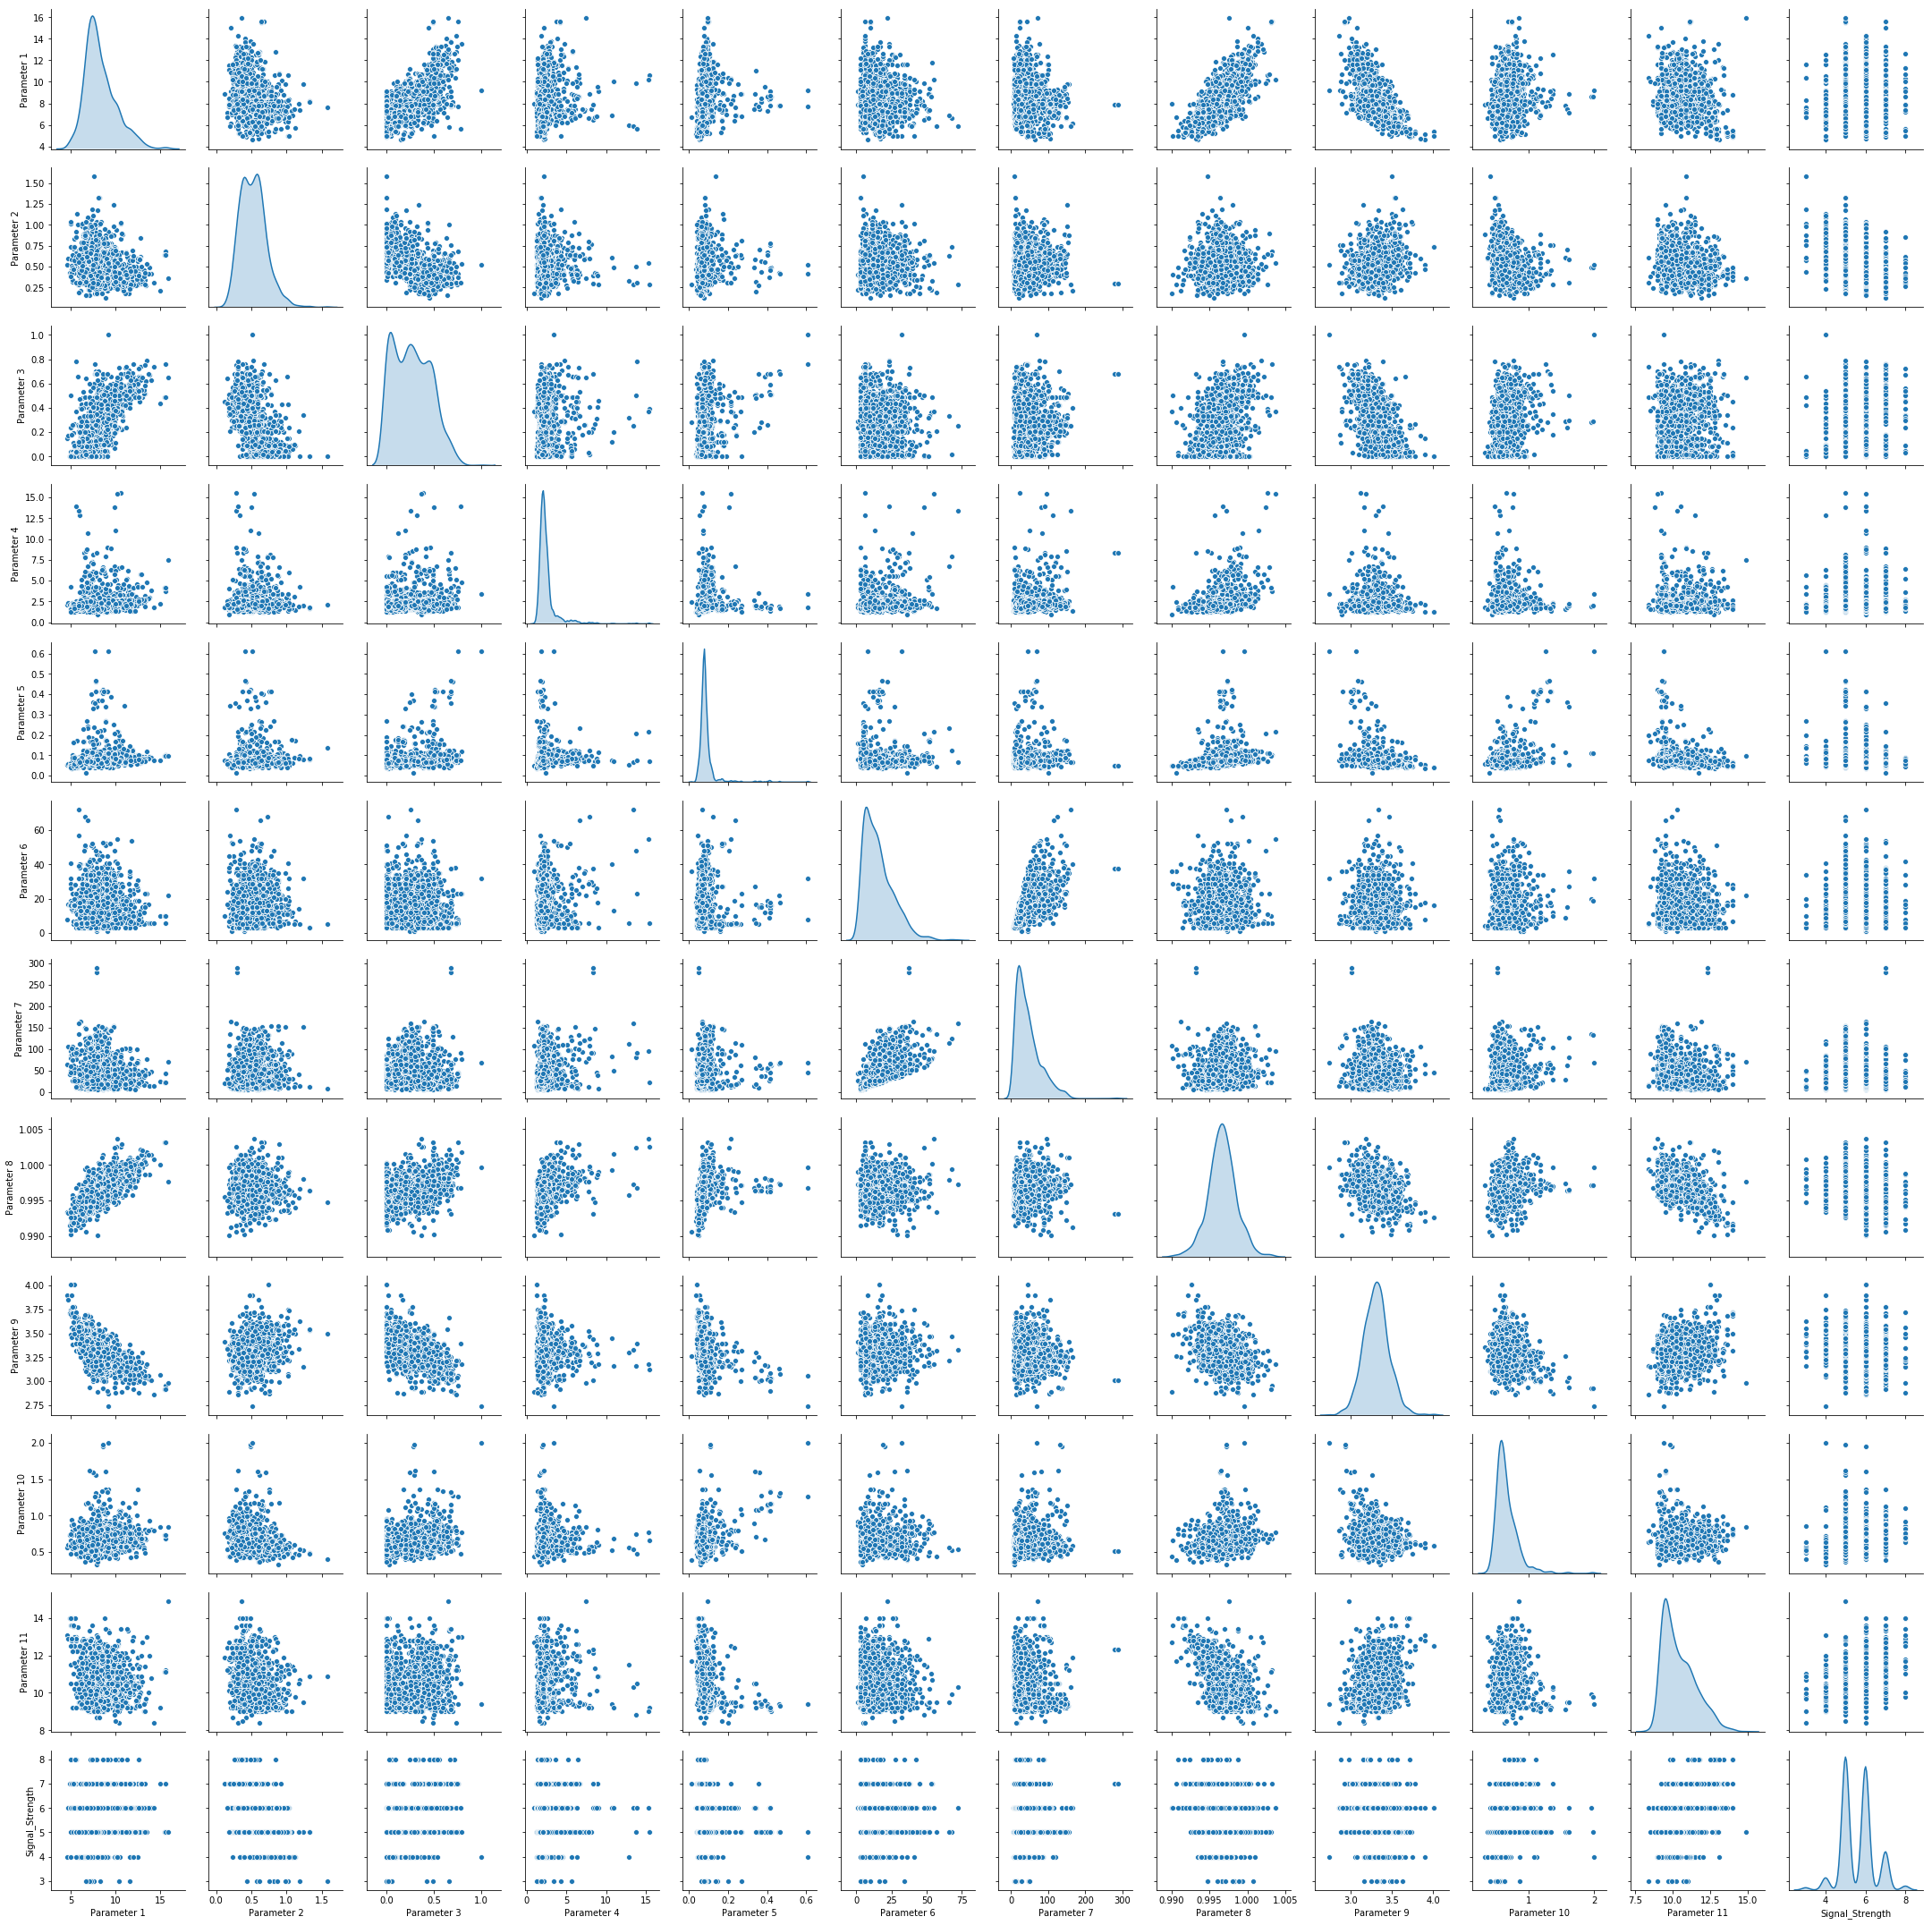

In [94]:
sns.pairplot(data_s,diag_kind="kde")

##### Parameters exhibit skews in distribution
##### Strong correlations are seen between few parameters

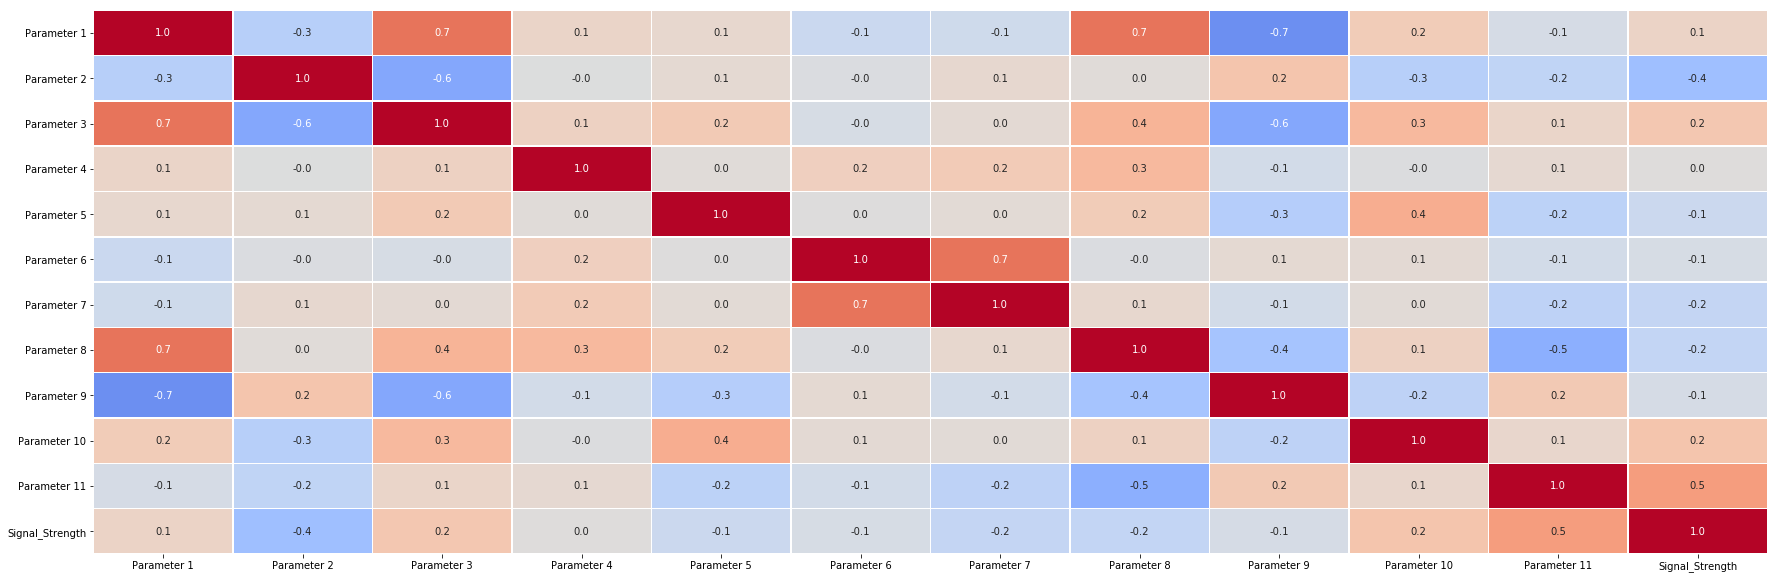

In [95]:
# check correlation between attributes
corr = data_s.corr()
plt.subplots(1,1,figsize=(30,10))
sns.heatmap(corr,annot=True,cmap='coolwarm', vmin=-1, vmax=1, fmt='.1f',linewidths=.5,center=0,cbar=False)

##### Signal_Strength has strong positive correlation with Parameter11 and good negative correlation with Parameter2
##### Strong correlations exists within parameters ex:Parameter6 and Parameter7 are strongly correlated. Parameter1 and Parameter8 are strongly correlated

In [96]:
data_s.groupby(['Signal_Strength']).size()

Signal_Strength
3     10
4     53
5    577
6    535
7    167
8     17
dtype: int64

##### Around 85% of the sample has signal_strength 5 or 6

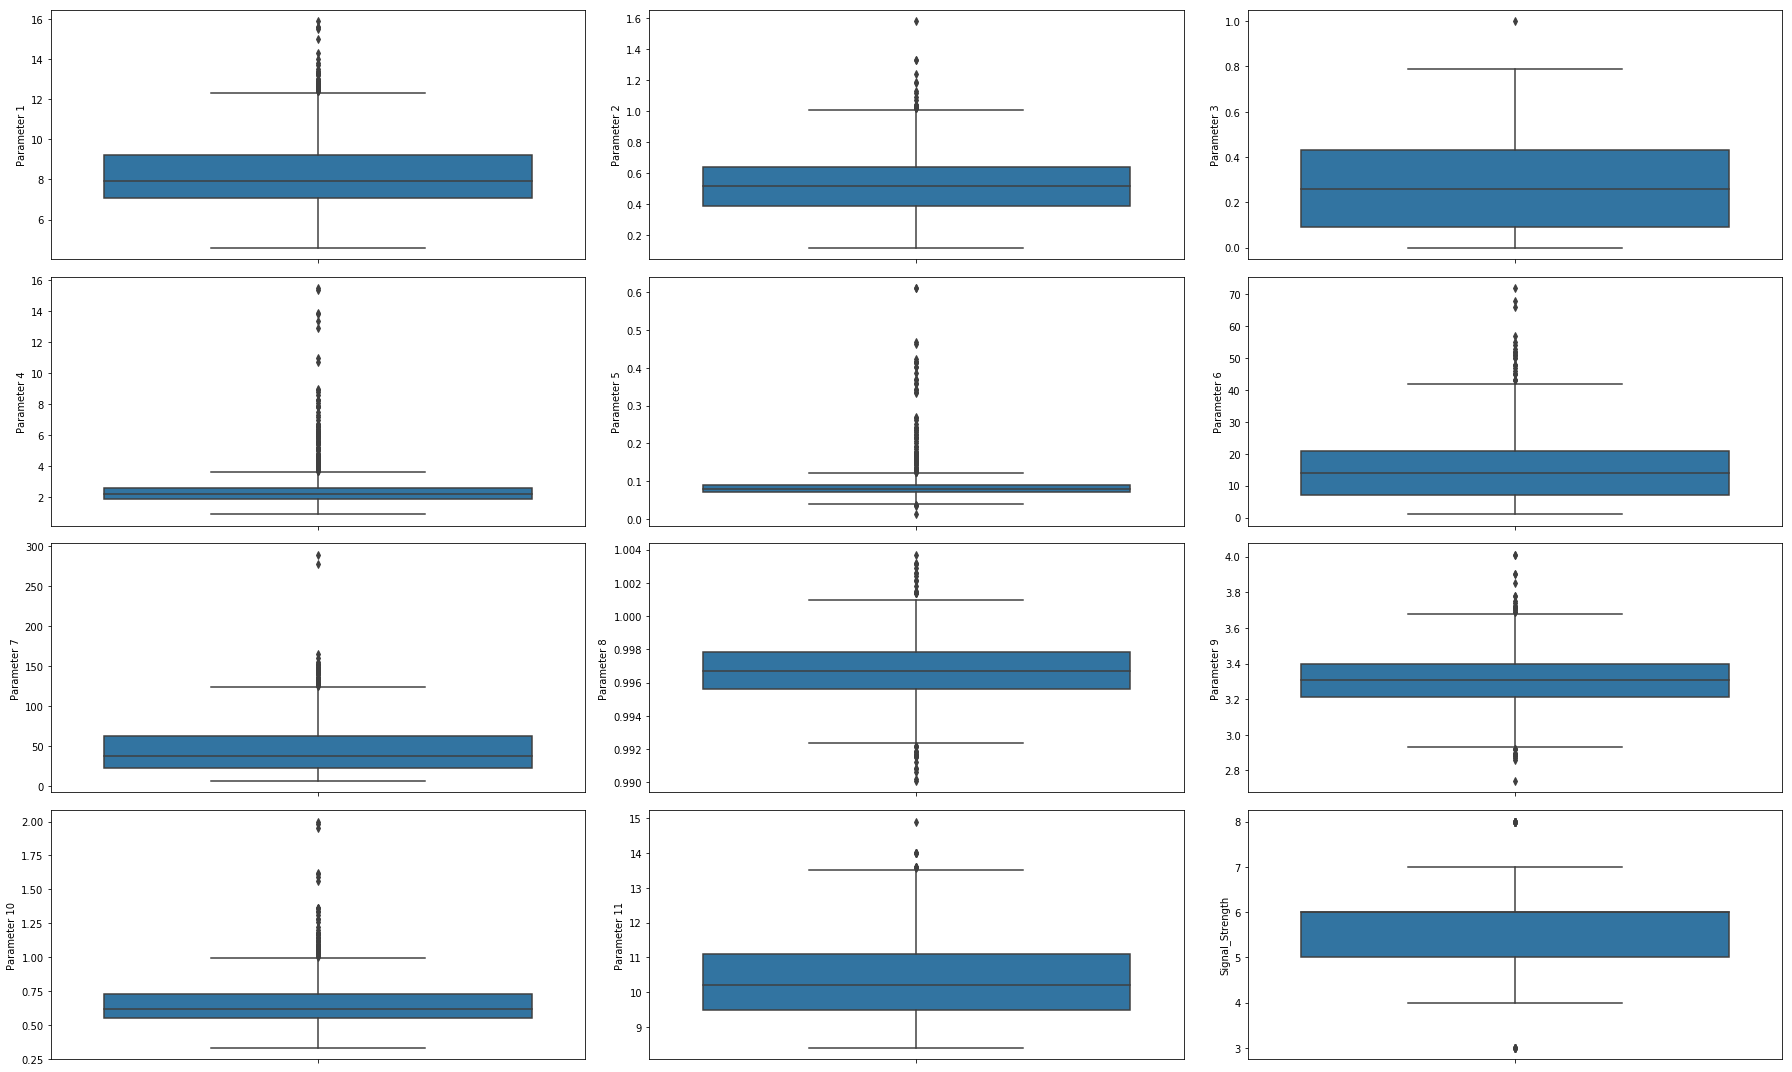

In [97]:
# Look at spread of continuous variables
fig, axs = plt.subplots(4,3,figsize=(25,15))

plt.rc('axes', titlesize=10)     # fontsize of the axes title
plt.rc('axes', labelsize=10)     # fontsize of the x and y labels

row = 0
position = 0

for i in range(0,data_s.shape[1]): 
    
    y=data_s.columns.values[i]
    
    # set position of subplot using mod operator
    position = (i+1) % 3
    if  position == 0:
        position = 3 # if 2nd position, mod will be 0. Set it to 3.

   
     # set row of subplot using i
    if ((i+1)%3==1) and i!=0 :
        row = row+1
    
    # boxplot
    sns.boxplot(ax = axs[row,position-1],
                y = y,
                data=data_s)
    
    
    
    plt.tight_layout()
    
plt.show()

##### Key parameters such as 2,11 etc. which have high correlation could have possible outliers

In [98]:
#Check co-eff usingg regular linear regression
#independent variables
x=data_s.iloc[:,:-1]

#dependent variables
y=data_s.iloc[:,-1]

#Train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

scale = StandardScaler()
xs_train = scale.fit_transform(x_train) # fit and transform x_train

xs_test = scale.transform(x_test) 

regression_model = LinearRegression()
regression_model.fit(xs_train, y_train)

#get co-efficient of model
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {:.2f}".format(col_name, regression_model.coef_[idx]))
    
#get intercept    
intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))

#check accuracy of train and test
train_accuracy=regression_model.score(xs_train, y_train)
test_accuracy=regression_model.score(scale.transform(x_test), y_test)
print("Train accuracy:",(round(train_accuracy,3))*100)
print("Test accuracy:",(round(test_accuracy,3))*100)

The coefficient for Parameter 1 is -0.00
The coefficient for Parameter 2 is -0.20
The coefficient for Parameter 3 is -0.02
The coefficient for Parameter 4 is -0.03
The coefficient for Parameter 5 is -0.09
The coefficient for Parameter 6 is 0.06
The coefficient for Parameter 7 is -0.10
The coefficient for Parameter 8 is 0.02
The coefficient for Parameter 9 is -0.09
The coefficient for Parameter 10 is 0.17
The coefficient for Parameter 11 is 0.35
The intercept for our model is 5.634069400630913
Train accuracy: 41.199999999999996
Test accuracy: 22.0


##### Parameter11, Parameter2 and Parmater10 seem to be key in predicting Signal_strength

##### Accuracy from Linear regression is quite low. Test accuracy is at 22%.

##### 3.Design, train, tune and test a neural network regressor.
Hint: Use best approach to refine and tune the data or the model. Be highly experimental here.

In [99]:
# Creates a model given an activation and learning rate
def create_model(Lambda,input_shape,lr=0.01,activation = 'relu',verb=True):
  
    # Create an Adam optimizer with the given learning rate
    opt = Adam(lr=lr)
  
    # Create FNN model  
    model = Sequential()
    
    # hidden layer with 6 neurons
    model.add(Dense(units = 128, 
                    activation = activation,
                    input_shape = input_shape,
                    kernel_regularizer = regularizers.l2(Lambda)))
    #2nd  hidden layer
    model.add(Dense(units = 128, 
                    activation = activation,
                    kernel_regularizer = regularizers.l2(Lambda)))
    
    # output layer with 1 output neuron without any activation function since its a regressor
    model.add(Dense(1,))
    # Compile the model
    model.compile(optimizer = opt,
                  loss = "mean_squared_error",
                  metrics=[tensorflow.keras.metrics.RootMeanSquaredError()])
    return model

In [100]:
def coeff_determination(y_true, y_pred):
#     y_true_mean = mean(y_true)
#     SS_res =  np.sum(((y_true-y_pred)**2))
#     SS_tot = np.sum(((y_true - y_true_mean )**2))
#     return ( 1 - (SS_res/SS_tot) )    

    y_bar = y_true.mean()
    ss_tot = ((y_true-y_bar)**2).sum()
    ss_res = ((y_true-y_pred)**2).sum()
    return 1 - (ss_res/ss_tot)

In [101]:
n_cols = data_s.shape[1]-1 # number of independent variables

#inputs to model
input_shape = (n_cols, )
lr = 0.00001
Lambda = 0
activation='relu'

# untrained model with single iteration
model  = create_model(Lambda,input_shape,lr,activation) # single interation. untrained model
model.fit(xs_train, y_train,epochs=1,verbose= 1) 
score = model.evaluate(xs_train, y_train, verbose=0)
print("mse,rmse:",score)

#calculate rsquared
y_pred = model.predict(xs_train)
pred = y_pred.ravel() # convert(R,1) to (R,)
# data = pd.DataFrame(pred)
# data.to_csv("out.csv")
r_square = coeff_determination(y_train.values,pred)
print("rsquared:",r_square)

30/30 [==============================] - 1s 3ms/step - loss: 32.1062 - root_mean_squared_error: 5.6662
mse,rmse: [31.831945419311523, 5.6419806480407715]
rsquared: -44.821392235699264


##### rsquare is worse for the untrained model

In [102]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 128)               1536      
                                                                 
 dense_88 (Dense)            (None, 128)               16512     
                                                                 
 dense_89 (Dense)            (None, 1)                 129       
                                                                 
Total params: 18,177
Trainable params: 18,177
Non-trainable params: 0
_________________________________________________________________


In [103]:
# fit with a subset of data
xs_train_subset = xs_train[:20,:]
y_train_subset = y_train[:20]

In [104]:
lr = 0.001
Lambda = 0
# Train a subset of data
model  = create_model(Lambda,input_shape,lr,activation) # single interation. untrained model
model.fit(xs_train_subset, y_train_subset,epochs=500,verbose= 1) 
score = model.evaluate(xs_train_subset, y_train_subset, verbose=0)
print("mse,rmse:",score)

#calculate rsquared
y_pred = model.predict(xs_train_subset)
pred = y_pred.ravel() # convert(R,1) to (R,)
r_square = coeff_determination(y_train_subset.values,pred)
print("rsquared:",r_square)

Epoch 1/500
1/1 [==============================] - 0s 392ms/step - loss: 41.0441 - root_mean_squared_error: 6.4066
Epoch 2/500
1/1 [==============================] - 0s 3ms/step - loss: 38.2172 - root_mean_squared_error: 6.1820
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 35.6064 - root_mean_squared_error: 5.9671
Epoch 4/500
1/1 [==============================] - 0s 4ms/step - loss: 33.1746 - root_mean_squared_error: 5.7597
Epoch 5/500
1/1 [==============================] - 0s 3ms/step - loss: 30.9087 - root_mean_squared_error: 5.5596
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 28.7764 - root_mean_squared_error: 5.3644
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 26.7785 - root_mean_squared_error: 5.1748
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 24.8999 - root_mean_squared_error: 4.9900
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 23.1432 - root_mean_squ

1/1 [==============================] - 0s 5ms/step - loss: 0.1497 - root_mean_squared_error: 0.3869
Epoch 73/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1457 - root_mean_squared_error: 0.3817
Epoch 74/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1417 - root_mean_squared_error: 0.3764
Epoch 75/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1376 - root_mean_squared_error: 0.3710
Epoch 76/500
1/1 [==============================] - 0s 5ms/step - loss: 0.1335 - root_mean_squared_error: 0.3653
Epoch 77/500
1/1 [==============================] - 0s 5ms/step - loss: 0.1292 - root_mean_squared_error: 0.3595
Epoch 78/500
1/1 [==============================] - 0s 5ms/step - loss: 0.1251 - root_mean_squared_error: 0.3537
Epoch 79/500
1/1 [==============================] - 0s 5ms/step - loss: 0.1211 - root_mean_squared_error: 0.3479
Epoch 80/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1173 - root_mean_squared_error: 0.3

1/1 [==============================] - 0s 3ms/step - loss: 0.0257 - root_mean_squared_error: 0.1603
Epoch 145/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0252 - root_mean_squared_error: 0.1588
Epoch 146/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0248 - root_mean_squared_error: 0.1573
Epoch 147/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0243 - root_mean_squared_error: 0.1559
Epoch 148/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0238 - root_mean_squared_error: 0.1544
Epoch 149/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0234 - root_mean_squared_error: 0.1529
Epoch 150/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0230 - root_mean_squared_error: 0.1516
Epoch 151/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0226 - root_mean_squared_error: 0.1502
Epoch 152/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0222 - root_mean_squared_er

Epoch 216/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0075 - root_mean_squared_error: 0.0869
Epoch 217/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0074 - root_mean_squared_error: 0.0861
Epoch 218/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0073 - root_mean_squared_error: 0.0855
Epoch 219/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0072 - root_mean_squared_error: 0.0848
Epoch 220/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0071 - root_mean_squared_error: 0.0841
Epoch 221/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0070 - root_mean_squared_error: 0.0834
Epoch 222/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0068 - root_mean_squared_error: 0.0827
Epoch 223/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0067 - root_mean_squared_error: 0.0820
Epoch 224/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0066 - root_m

1/1 [==============================] - 0s 4ms/step - loss: 0.0024 - root_mean_squared_error: 0.0491
Epoch 288/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0024 - root_mean_squared_error: 0.0487
Epoch 289/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0023 - root_mean_squared_error: 0.0483
Epoch 290/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0023 - root_mean_squared_error: 0.0479
Epoch 291/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0023 - root_mean_squared_error: 0.0476
Epoch 292/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0022 - root_mean_squared_error: 0.0472
Epoch 293/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0022 - root_mean_squared_error: 0.0468
Epoch 294/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0022 - root_mean_squared_error: 0.0464
Epoch 295/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0021 - root_mean_squared_er

1/1 [==============================] - 0s 6ms/step - loss: 7.1495e-04 - root_mean_squared_error: 0.0267
Epoch 359/500
1/1 [==============================] - 0s 4ms/step - loss: 7.0291e-04 - root_mean_squared_error: 0.0265
Epoch 360/500
1/1 [==============================] - 0s 5ms/step - loss: 6.9203e-04 - root_mean_squared_error: 0.0263
Epoch 361/500
1/1 [==============================] - 0s 4ms/step - loss: 6.8116e-04 - root_mean_squared_error: 0.0261
Epoch 362/500
1/1 [==============================] - 0s 5ms/step - loss: 6.7023e-04 - root_mean_squared_error: 0.0259
Epoch 363/500
1/1 [==============================] - 0s 4ms/step - loss: 6.5955e-04 - root_mean_squared_error: 0.0257
Epoch 364/500
1/1 [==============================] - 0s 4ms/step - loss: 6.4907e-04 - root_mean_squared_error: 0.0255
Epoch 365/500
1/1 [==============================] - 0s 4ms/step - loss: 6.3885e-04 - root_mean_squared_error: 0.0253
Epoch 366/500
1/1 [==============================] - 0s 4ms/step - los

1/1 [==============================] - 0s 4ms/step - loss: 2.3733e-04 - root_mean_squared_error: 0.0154
Epoch 428/500
1/1 [==============================] - 0s 5ms/step - loss: 2.3344e-04 - root_mean_squared_error: 0.0153
Epoch 429/500
1/1 [==============================] - 0s 3ms/step - loss: 2.2960e-04 - root_mean_squared_error: 0.0152
Epoch 430/500
1/1 [==============================] - 0s 4ms/step - loss: 2.2583e-04 - root_mean_squared_error: 0.0150
Epoch 431/500
1/1 [==============================] - 0s 4ms/step - loss: 2.2223e-04 - root_mean_squared_error: 0.0149
Epoch 432/500
1/1 [==============================] - 0s 5ms/step - loss: 2.1856e-04 - root_mean_squared_error: 0.0148
Epoch 433/500
1/1 [==============================] - 0s 3ms/step - loss: 2.1490e-04 - root_mean_squared_error: 0.0147
Epoch 434/500
1/1 [==============================] - 0s 4ms/step - loss: 2.1140e-04 - root_mean_squared_error: 0.0145
Epoch 435/500
1/1 [==============================] - 0s 6ms/step - los

1/1 [==============================] - 0s 4ms/step - loss: 7.2757e-05 - root_mean_squared_error: 0.0085
Epoch 497/500
1/1 [==============================] - 0s 4ms/step - loss: 7.1451e-05 - root_mean_squared_error: 0.0085
Epoch 498/500
1/1 [==============================] - 0s 5ms/step - loss: 7.0201e-05 - root_mean_squared_error: 0.0084
Epoch 499/500
1/1 [==============================] - 0s 3ms/step - loss: 6.8963e-05 - root_mean_squared_error: 0.0083
Epoch 500/500
1/1 [==============================] - 0s 3ms/step - loss: 6.7747e-05 - root_mean_squared_error: 0.0082
mse,rmse: [6.653700984315947e-05, 0.008157022297382355]
rsquared: 0.999928261552575


##### we are able to achieve high level of Rsquare by overfitting to a small sample. Settling for 2 hidden layers with 128 nodes each in the architecture

In [105]:
lr = 0.001
Lambda = 0
# Train data
model  = create_model(Lambda,input_shape,lr,activation) # single interation. untrained model
model.fit(xs_train, y_train,epochs=400,verbose= 1) 
score = model.evaluate(xs_train, y_train, verbose=0)
print("mse,rmse:",score)

#calculate rsquared
y_pred = model.predict(xs_train)
pred = y_pred.ravel() # convert(R,1) to (R,)
r_square = coeff_determination(y_train.values,pred)
print("rsquared:",r_square)

Epoch 1/400
30/30 [==============================] - 1s 2ms/step - loss: 13.9420 - root_mean_squared_error: 3.7339
Epoch 2/400
30/30 [==============================] - 0s 2ms/step - loss: 2.9345 - root_mean_squared_error: 1.7130
Epoch 3/400
30/30 [==============================] - 0s 2ms/step - loss: 2.1099 - root_mean_squared_error: 1.4526
Epoch 4/400
30/30 [==============================] - 0s 2ms/step - loss: 1.8008 - root_mean_squared_error: 1.3419
Epoch 5/400
30/30 [==============================] - 0s 2ms/step - loss: 1.5743 - root_mean_squared_error: 1.2547
Epoch 6/400
30/30 [==============================] - 0s 2ms/step - loss: 1.3977 - root_mean_squared_error: 1.1822
Epoch 7/400
30/30 [==============================] - 0s 2ms/step - loss: 1.2350 - root_mean_squared_error: 1.1113
Epoch 8/400
30/30 [==============================] - 0s 2ms/step - loss: 1.1024 - root_mean_squared_error: 1.0500
Epoch 9/400
30/30 [==============================] - 0s 2ms/step - loss: 0.9734 - root_

30/30 [==============================] - 0s 1ms/step - loss: 0.2074 - root_mean_squared_error: 0.4554
Epoch 73/400
30/30 [==============================] - 0s 2ms/step - loss: 0.2012 - root_mean_squared_error: 0.4485
Epoch 74/400
30/30 [==============================] - 0s 1ms/step - loss: 0.2004 - root_mean_squared_error: 0.4476
Epoch 75/400
30/30 [==============================] - 0s 1ms/step - loss: 0.1945 - root_mean_squared_error: 0.4410
Epoch 76/400
30/30 [==============================] - 0s 1ms/step - loss: 0.2001 - root_mean_squared_error: 0.4473
Epoch 77/400
30/30 [==============================] - 0s 1ms/step - loss: 0.2164 - root_mean_squared_error: 0.4652
Epoch 78/400
30/30 [==============================] - 0s 1ms/step - loss: 0.2069 - root_mean_squared_error: 0.4548
Epoch 79/400
30/30 [==============================] - 0s 1ms/step - loss: 0.1960 - root_mean_squared_error: 0.4427
Epoch 80/400
30/30 [==============================] - 0s 1ms/step - loss: 0.1805 - root_mean_

Epoch 143/400
30/30 [==============================] - 0s 1ms/step - loss: 0.1036 - root_mean_squared_error: 0.3218
Epoch 144/400
30/30 [==============================] - 0s 2ms/step - loss: 0.0993 - root_mean_squared_error: 0.3151
Epoch 145/400
30/30 [==============================] - 0s 2ms/step - loss: 0.1096 - root_mean_squared_error: 0.3311
Epoch 146/400
30/30 [==============================] - 0s 1ms/step - loss: 0.1002 - root_mean_squared_error: 0.3166
Epoch 147/400
30/30 [==============================] - 0s 1ms/step - loss: 0.1052 - root_mean_squared_error: 0.3244
Epoch 148/400
30/30 [==============================] - 0s 1ms/step - loss: 0.0980 - root_mean_squared_error: 0.3130
Epoch 149/400
30/30 [==============================] - 0s 2ms/step - loss: 0.0954 - root_mean_squared_error: 0.3089
Epoch 150/400
30/30 [==============================] - 0s 2ms/step - loss: 0.0858 - root_mean_squared_error: 0.2930
Epoch 151/400
30/30 [==============================] - 0s 2ms/step - los

30/30 [==============================] - 0s 2ms/step - loss: 0.0554 - root_mean_squared_error: 0.2353
Epoch 214/400
30/30 [==============================] - 0s 2ms/step - loss: 0.0543 - root_mean_squared_error: 0.2331
Epoch 215/400
30/30 [==============================] - 0s 2ms/step - loss: 0.0654 - root_mean_squared_error: 0.2558
Epoch 216/400
30/30 [==============================] - 0s 1ms/step - loss: 0.0516 - root_mean_squared_error: 0.2271
Epoch 217/400
30/30 [==============================] - 0s 1ms/step - loss: 0.0539 - root_mean_squared_error: 0.2321
Epoch 218/400
30/30 [==============================] - 0s 1ms/step - loss: 0.0636 - root_mean_squared_error: 0.2522
Epoch 219/400
30/30 [==============================] - 0s 2ms/step - loss: 0.0559 - root_mean_squared_error: 0.2365
Epoch 220/400
30/30 [==============================] - 0s 2ms/step - loss: 0.0535 - root_mean_squared_error: 0.2314
Epoch 221/400
30/30 [==============================] - 0s 1ms/step - loss: 0.0433 - ro

30/30 [==============================] - 0s 2ms/step - loss: 0.0256 - root_mean_squared_error: 0.1599
Epoch 284/400
30/30 [==============================] - 0s 2ms/step - loss: 0.0247 - root_mean_squared_error: 0.1573
Epoch 285/400
30/30 [==============================] - 0s 1ms/step - loss: 0.0246 - root_mean_squared_error: 0.1567
Epoch 286/400
30/30 [==============================] - 0s 2ms/step - loss: 0.0497 - root_mean_squared_error: 0.2230
Epoch 287/400
30/30 [==============================] - 0s 2ms/step - loss: 0.0450 - root_mean_squared_error: 0.2122
Epoch 288/400
30/30 [==============================] - 0s 2ms/step - loss: 0.0423 - root_mean_squared_error: 0.2056
Epoch 289/400
30/30 [==============================] - 0s 2ms/step - loss: 0.0359 - root_mean_squared_error: 0.1896
Epoch 290/400
30/30 [==============================] - 0s 1ms/step - loss: 0.0327 - root_mean_squared_error: 0.1810
Epoch 291/400
30/30 [==============================] - 0s 2ms/step - loss: 0.0497 - ro

30/30 [==============================] - 0s 2ms/step - loss: 0.0265 - root_mean_squared_error: 0.1627
Epoch 354/400
30/30 [==============================] - 0s 2ms/step - loss: 0.0233 - root_mean_squared_error: 0.1528
Epoch 355/400
30/30 [==============================] - 0s 1ms/step - loss: 0.0254 - root_mean_squared_error: 0.1595
Epoch 356/400
30/30 [==============================] - 0s 1ms/step - loss: 0.0219 - root_mean_squared_error: 0.1481
Epoch 357/400
30/30 [==============================] - 0s 1ms/step - loss: 0.0189 - root_mean_squared_error: 0.1375
Epoch 358/400
30/30 [==============================] - 0s 2ms/step - loss: 0.0193 - root_mean_squared_error: 0.1388
Epoch 359/400
30/30 [==============================] - 0s 2ms/step - loss: 0.0164 - root_mean_squared_error: 0.1282
Epoch 360/400
30/30 [==============================] - 0s 2ms/step - loss: 0.0167 - root_mean_squared_error: 0.1292
Epoch 361/400
30/30 [==============================] - 0s 2ms/step - loss: 0.0226 - ro

##### Training r square at 93%.

In [106]:
score = model.evaluate(xs_test,y_test)
print("mse,rmse:",score)

#calculate rsquared
y_pred = model.predict(xs_test)
pred = y_pred.ravel() # convert(R,1) to (R,)
r_square = coeff_determination(y_test.values,pred)
print("rsquared:",r_square)

13/13 [==============================] - 0s 2ms/step - loss: 0.7995 - root_mean_squared_error: 0.8942
mse,rmse: [0.7995408177375793, 0.8941704630851746]
rsquared: -0.25428569930324163


##### Testing rsquare is still bad. While losses have come down

##### Trying below techniques to improve accuracy
1. Weight Initialization
2. Batch Normalization
3. Dropout

In [107]:
# Creates a model with weight initialization
def create_model_weight_init(Lambda,input_shape,lr=0.01,activation = 'relu',verb=True):
  
    # Create an Adam optimizer with the given learning rate
    opt = Adam(lr=lr)
  
    # Create FNN model  
    model = Sequential()
    
    #1st hidden layer 
    model.add(Dense(units = 128, 
                    activation = activation,
                    input_shape = input_shape,
                    kernel_regularizer = regularizers.l2(Lambda),
                    kernel_initializer='he_normal'
                   )
             ) # added weight initializer
    #2nd  hidden layer
    model.add(Dense(units = 128, 
                    activation = activation,
                    kernel_regularizer = regularizers.l2(Lambda),
                   kernel_initializer='he_normal'
                   )
             ) # added weight initializer
                
    
    # output layer with 1 output neuron without any activation function since its a regressor
    model.add(Dense(1,))
    # Compile the model
    model.compile(optimizer = opt,
                  loss = "mean_squared_error",
                  metrics=[tensorflow.keras.metrics.RootMeanSquaredError()])
    return model

In [108]:
lr = 0.001
Lambda = 0
# Train a subset of data
model  = create_model_weight_init(Lambda,input_shape,lr,activation) # single interation. untrained model
model.fit(xs_train, y_train,epochs=500,verbose= 1) 
score = model.evaluate(xs_train, y_train, verbose=0)
print("mse,rmse:",score)

#calculate rsquared
y_pred = model.predict(xs_train)
pred = y_pred.ravel() # convert(R,1) to (R,)
r_square = coeff_determination(y_train.values,pred)
print("rsquared:",r_square)

Epoch 1/500
30/30 [==============================] - 0s 2ms/step - loss: 7.8463 - root_mean_squared_error: 2.8011
Epoch 2/500
30/30 [==============================] - 0s 2ms/step - loss: 2.7531 - root_mean_squared_error: 1.6593
Epoch 3/500
30/30 [==============================] - 0s 2ms/step - loss: 2.2516 - root_mean_squared_error: 1.5005
Epoch 4/500
30/30 [==============================] - 0s 2ms/step - loss: 1.9554 - root_mean_squared_error: 1.3984
Epoch 5/500
30/30 [==============================] - 0s 2ms/step - loss: 1.7200 - root_mean_squared_error: 1.3115
Epoch 6/500
30/30 [==============================] - 0s 2ms/step - loss: 1.5264 - root_mean_squared_error: 1.2355
Epoch 7/500
30/30 [==============================] - 0s 2ms/step - loss: 1.3741 - root_mean_squared_error: 1.1722
Epoch 8/500
30/30 [==============================] - 0s 1ms/step - loss: 1.2535 - root_mean_squared_error: 1.1196
Epoch 9/500
30/30 [==============================] - 0s 2ms/step - loss: 1.1282 - root_m

30/30 [==============================] - 0s 1ms/step - loss: 0.1110 - root_mean_squared_error: 0.3331
Epoch 73/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1127 - root_mean_squared_error: 0.3357
Epoch 74/500
30/30 [==============================] - 0s 2ms/step - loss: 0.1120 - root_mean_squared_error: 0.3346
Epoch 75/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1069 - root_mean_squared_error: 0.3270
Epoch 76/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1096 - root_mean_squared_error: 0.3310
Epoch 77/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0998 - root_mean_squared_error: 0.3160
Epoch 78/500
30/30 [==============================] - 0s 2ms/step - loss: 0.1031 - root_mean_squared_error: 0.3211
Epoch 79/500
30/30 [==============================] - 0s 2ms/step - loss: 0.1399 - root_mean_squared_error: 0.3741
Epoch 80/500
30/30 [==============================] - 0s 2ms/step - loss: 0.1135 - root_mean_

Epoch 143/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0419 - root_mean_squared_error: 0.2046
Epoch 144/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0518 - root_mean_squared_error: 0.2277
Epoch 145/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0548 - root_mean_squared_error: 0.2341
Epoch 146/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0630 - root_mean_squared_error: 0.2510
Epoch 147/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0648 - root_mean_squared_error: 0.2546
Epoch 148/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0465 - root_mean_squared_error: 0.2156
Epoch 149/500
30/30 [==============================] - 0s 3ms/step - loss: 0.0506 - root_mean_squared_error: 0.2250
Epoch 150/500
30/30 [==============================] - 0s 6ms/step - loss: 0.0515 - root_mean_squared_error: 0.2268
Epoch 151/500
30/30 [==============================] - 0s 1ms/step - los

30/30 [==============================] - 0s 1ms/step - loss: 0.0132 - root_mean_squared_error: 0.1148
Epoch 214/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0147 - root_mean_squared_error: 0.1213
Epoch 215/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0315 - root_mean_squared_error: 0.1775
Epoch 216/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0454 - root_mean_squared_error: 0.2130
Epoch 217/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0691 - root_mean_squared_error: 0.2630
Epoch 218/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0638 - root_mean_squared_error: 0.2526
Epoch 219/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0445 - root_mean_squared_error: 0.2110
Epoch 220/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0375 - root_mean_squared_error: 0.1938
Epoch 221/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0329 - ro

30/30 [==============================] - 0s 1ms/step - loss: 0.0195 - root_mean_squared_error: 0.1397
Epoch 284/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0150 - root_mean_squared_error: 0.1224
Epoch 285/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0110 - root_mean_squared_error: 0.1048
Epoch 286/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0088 - root_mean_squared_error: 0.0938
Epoch 287/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0103 - root_mean_squared_error: 0.1014
Epoch 288/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0103 - root_mean_squared_error: 0.1015
Epoch 289/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0172 - root_mean_squared_error: 0.1312
Epoch 290/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0172 - root_mean_squared_error: 0.1311
Epoch 291/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0138 - ro

30/30 [==============================] - 0s 1ms/step - loss: 0.0089 - root_mean_squared_error: 0.0943
Epoch 354/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0106 - root_mean_squared_error: 0.1029
Epoch 355/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0109 - root_mean_squared_error: 0.1043
Epoch 356/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0175 - root_mean_squared_error: 0.1322
Epoch 357/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0368 - root_mean_squared_error: 0.1918
Epoch 358/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0281 - root_mean_squared_error: 0.1676
Epoch 359/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0315 - root_mean_squared_error: 0.1774
Epoch 360/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0181 - root_mean_squared_error: 0.1347
Epoch 361/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0132 - ro

30/30 [==============================] - 0s 1ms/step - loss: 0.0206 - root_mean_squared_error: 0.1434
Epoch 424/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0124 - root_mean_squared_error: 0.1113
Epoch 425/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0231 - root_mean_squared_error: 0.1521
Epoch 426/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0174 - root_mean_squared_error: 0.1318
Epoch 427/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0192 - root_mean_squared_error: 0.1386
Epoch 428/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0137 - root_mean_squared_error: 0.1172
Epoch 429/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0116 - root_mean_squared_error: 0.1077
Epoch 430/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0090 - root_mean_squared_error: 0.0949
Epoch 431/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0127 - ro

30/30 [==============================] - 0s 1ms/step - loss: 0.0414 - root_mean_squared_error: 0.2035
Epoch 494/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0774 - root_mean_squared_error: 0.2782
Epoch 495/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0448 - root_mean_squared_error: 0.2116
Epoch 496/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0348 - root_mean_squared_error: 0.1866
Epoch 497/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0241 - root_mean_squared_error: 0.1553
Epoch 498/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0192 - root_mean_squared_error: 0.1385
Epoch 499/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0199 - root_mean_squared_error: 0.1412
Epoch 500/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0126 - root_mean_squared_error: 0.1123
mse,rmse: [0.011110384948551655, 0.10540580749511719]
rsquared: 0.9840068450264658


##### Training rsquare improved to 98%

##### 2. Add batch normalisation

In [109]:
# Creates a model with batch normalisation
def create_model_batch_norm(Lambda,input_shape,lr=0.01,activation = 'relu',verb=True):
  
    # Create an Adam optimizer with the given learning rate
    opt = Adam(lr=lr)
  
    # Create FNN model  
    model = Sequential()
    
    # 1st hidden layer
    model.add(Dense(units = 128, 
                    input_shape = input_shape, 
                    kernel_regularizer = regularizers.l2(Lambda), # regularization
                    kernel_initializer='he_normal' # added weight initializer
                   )
             ) 
    model.add(BatchNormalization()) # normalize before activation
    model.add(Activation(activation))
    
    #2nd  hidden layer
    model.add(Dense(units = 128, 
                   kernel_regularizer = regularizers.l2(Lambda), # regularization
                   kernel_initializer='he_normal'  # added weight initializer
                   )
             ) 
    model.add(BatchNormalization()) # normalize before activation
    model.add(Activation(activation))
                
    
    # output layer with 1 output neuron without any activation function since its a regressor
    model.add(Dense(1,))
    # Compile the model
    model.compile(optimizer = opt,
                  loss = "mean_squared_error",
                  metrics=[tensorflow.keras.metrics.RootMeanSquaredError()])
    return model

In [110]:
lr = 0.001
Lambda = 0
# Train a subset of data
model  = create_model_batch_norm(Lambda,input_shape,lr,activation) # single interation. untrained model
model.fit(xs_train, y_train,epochs=500,verbose= 1) 
score = model.evaluate(xs_train, y_train, verbose=0)
print("mse,rmse:",score)

#calculate rsquared
y_pred = model.predict(xs_train)
pred = y_pred.ravel() # convert(R,1) to (R,)
r_square = coeff_determination(y_train.values,pred)
print("rsquared:",r_square)

Epoch 1/500
30/30 [==============================] - 1s 2ms/step - loss: 33.9772 - root_mean_squared_error: 5.8290
Epoch 2/500
30/30 [==============================] - 0s 3ms/step - loss: 16.2205 - root_mean_squared_error: 4.0275
Epoch 3/500
30/30 [==============================] - 0s 3ms/step - loss: 6.6359 - root_mean_squared_error: 2.5760
Epoch 4/500
30/30 [==============================] - 0s 3ms/step - loss: 2.4390 - root_mean_squared_error: 1.5617
Epoch 5/500
30/30 [==============================] - 0s 3ms/step - loss: 0.9633 - root_mean_squared_error: 0.9815
Epoch 6/500
30/30 [==============================] - 0s 3ms/step - loss: 0.5968 - root_mean_squared_error: 0.7725
Epoch 7/500
30/30 [==============================] - 0s 3ms/step - loss: 0.5124 - root_mean_squared_error: 0.7158
Epoch 8/500
30/30 [==============================] - 0s 2ms/step - loss: 0.4480 - root_mean_squared_error: 0.6693
Epoch 9/500
30/30 [==============================] - 0s 2ms/step - loss: 0.4531 - root

30/30 [==============================] - 0s 2ms/step - loss: 0.2351 - root_mean_squared_error: 0.4849
Epoch 73/500
30/30 [==============================] - 0s 2ms/step - loss: 0.2424 - root_mean_squared_error: 0.4924
Epoch 74/500
30/30 [==============================] - 0s 2ms/step - loss: 0.2271 - root_mean_squared_error: 0.4766
Epoch 75/500
30/30 [==============================] - 0s 2ms/step - loss: 0.2297 - root_mean_squared_error: 0.4793
Epoch 76/500
30/30 [==============================] - 0s 2ms/step - loss: 0.2197 - root_mean_squared_error: 0.4687
Epoch 77/500
30/30 [==============================] - 0s 2ms/step - loss: 0.2238 - root_mean_squared_error: 0.4730
Epoch 78/500
30/30 [==============================] - 0s 3ms/step - loss: 0.2236 - root_mean_squared_error: 0.4729
Epoch 79/500
30/30 [==============================] - 0s 2ms/step - loss: 0.2296 - root_mean_squared_error: 0.4791
Epoch 80/500
30/30 [==============================] - 0s 3ms/step - loss: 0.2472 - root_mean_

30/30 [==============================] - 0s 2ms/step - loss: 0.1820 - root_mean_squared_error: 0.4266
Epoch 143/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1751 - root_mean_squared_error: 0.4185
Epoch 144/500
30/30 [==============================] - 0s 2ms/step - loss: 0.1745 - root_mean_squared_error: 0.4177
Epoch 145/500
30/30 [==============================] - 0s 2ms/step - loss: 0.1879 - root_mean_squared_error: 0.4335
Epoch 146/500
30/30 [==============================] - 0s 2ms/step - loss: 0.1767 - root_mean_squared_error: 0.4203
Epoch 147/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1871 - root_mean_squared_error: 0.4326
Epoch 148/500
30/30 [==============================] - 0s 2ms/step - loss: 0.1578 - root_mean_squared_error: 0.3973
Epoch 149/500
30/30 [==============================] - 0s 2ms/step - loss: 0.1631 - root_mean_squared_error: 0.4039
Epoch 150/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1688 - ro

30/30 [==============================] - 0s 3ms/step - loss: 0.1515 - root_mean_squared_error: 0.3892
Epoch 213/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1429 - root_mean_squared_error: 0.3781
Epoch 214/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1558 - root_mean_squared_error: 0.3948
Epoch 215/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1652 - root_mean_squared_error: 0.4065
Epoch 216/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1486 - root_mean_squared_error: 0.3855
Epoch 217/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1724 - root_mean_squared_error: 0.4152
Epoch 218/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1462 - root_mean_squared_error: 0.3823
Epoch 219/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1502 - root_mean_squared_error: 0.3876
Epoch 220/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1580 - ro

30/30 [==============================] - 0s 3ms/step - loss: 0.1187 - root_mean_squared_error: 0.3445
Epoch 283/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1319 - root_mean_squared_error: 0.3632
Epoch 284/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1181 - root_mean_squared_error: 0.3437
Epoch 285/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1422 - root_mean_squared_error: 0.3770
Epoch 286/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1232 - root_mean_squared_error: 0.3510
Epoch 287/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1310 - root_mean_squared_error: 0.3619
Epoch 288/500
30/30 [==============================] - 0s 4ms/step - loss: 0.1304 - root_mean_squared_error: 0.3611
Epoch 289/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1281 - root_mean_squared_error: 0.3579
Epoch 290/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1290 - ro

30/30 [==============================] - 0s 3ms/step - loss: 0.1407 - root_mean_squared_error: 0.3750
Epoch 353/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1266 - root_mean_squared_error: 0.3558
Epoch 354/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1317 - root_mean_squared_error: 0.3629
Epoch 355/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1389 - root_mean_squared_error: 0.3728
Epoch 356/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1304 - root_mean_squared_error: 0.3611
Epoch 357/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1273 - root_mean_squared_error: 0.3568
Epoch 358/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1237 - root_mean_squared_error: 0.3517
Epoch 359/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1251 - root_mean_squared_error: 0.3537
Epoch 360/500
30/30 [==============================] - 0s 4ms/step - loss: 0.1202 - ro

30/30 [==============================] - 0s 3ms/step - loss: 0.0960 - root_mean_squared_error: 0.3098
Epoch 423/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1026 - root_mean_squared_error: 0.3203
Epoch 424/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1154 - root_mean_squared_error: 0.3397
Epoch 425/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1046 - root_mean_squared_error: 0.3234
Epoch 426/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1237 - root_mean_squared_error: 0.3517
Epoch 427/500
30/30 [==============================] - 0s 3ms/step - loss: 0.0969 - root_mean_squared_error: 0.3114
Epoch 428/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1060 - root_mean_squared_error: 0.3256
Epoch 429/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1037 - root_mean_squared_error: 0.3221
Epoch 430/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1147 - ro

30/30 [==============================] - 0s 4ms/step - loss: 0.1033 - root_mean_squared_error: 0.3214
Epoch 493/500
30/30 [==============================] - 0s 4ms/step - loss: 0.1014 - root_mean_squared_error: 0.3184
Epoch 494/500
30/30 [==============================] - 0s 4ms/step - loss: 0.1041 - root_mean_squared_error: 0.3227
Epoch 495/500
30/30 [==============================] - 0s 4ms/step - loss: 0.1123 - root_mean_squared_error: 0.3351
Epoch 496/500
30/30 [==============================] - 0s 4ms/step - loss: 0.1012 - root_mean_squared_error: 0.3180
Epoch 497/500
30/30 [==============================] - 0s 3ms/step - loss: 0.0974 - root_mean_squared_error: 0.3121
Epoch 498/500
30/30 [==============================] - 0s 4ms/step - loss: 0.1091 - root_mean_squared_error: 0.3303
Epoch 499/500
30/30 [==============================] - 0s 4ms/step - loss: 0.0922 - root_mean_squared_error: 0.3036
Epoch 500/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1070 - ro

##### 3. Adding Dropout to the model

In [146]:
# Creates a model with dropout
def create_model_dropout(Lambda,dropout=0.2,lr=0.01,activation = 'relu',verb=True):
  
    # Create an Adam optimizer with the given learning rate
    opt = Adam(lr=lr)
  
    # Create FNN model  
    model = Sequential()
    
    #1 hidden layer
    model.add(Dense(units = 128, 
                    input_shape = (11,), 
                    kernel_regularizer = regularizers.l2(Lambda), # regularization
                    kernel_initializer='he_normal' # added weight initializer
                   )
             ) 
    model.add(BatchNormalization()) # normalize before activation
    model.add(Activation(activation))
    model.add(Dropout(dropout)) # added dropout
    
    #2nd  hidden layer
    model.add(Dense(units = 128, 
                   kernel_regularizer = regularizers.l2(Lambda), # regularization
                   kernel_initializer='he_normal'  # added weight initializer
                   )
             ) 
    
    
    model.add(BatchNormalization()) # normalize before activation
    model.add(Activation(activation))
    model.add(Dropout(dropout)) # added dropout

   
    # output layer with 1 output neuron without any activation function since its a regressor
    model.add(Dense(1,))
    # Compile the model
    model.compile(optimizer = opt,
                  loss = "mean_squared_error",
                  metrics=[tensorflow.keras.metrics.RootMeanSquaredError()])
    return model

In [149]:
lr = 0.001
Lambda = 0
dropout=0.2
# Train a subset of data
model  = create_model_dropout(Lambda,dropout,lr,activation) # single interation. untrained model
model.fit(xs_train, y_train,epochs=200,verbose= 1) 
score = model.evaluate(xs_train, y_train, verbose=0)
print("mse,rmse:",score)

#calculate rsquared
y_pred = model.predict(xs_train)
pred = y_pred.ravel() # convert(R,1) to (R,)
r_square = coeff_determination(y_train.values,pred)
print("rsquared:",r_square)

Epoch 1/200
30/30 [==============================] - 1s 3ms/step - loss: 29.5477 - root_mean_squared_error: 5.4358
Epoch 2/200
30/30 [==============================] - 0s 3ms/step - loss: 14.1233 - root_mean_squared_error: 3.7581
Epoch 3/200
30/30 [==============================] - 0s 3ms/step - loss: 6.0308 - root_mean_squared_error: 2.4558
Epoch 4/200
30/30 [==============================] - 0s 3ms/step - loss: 2.5084 - root_mean_squared_error: 1.5838
Epoch 5/200
30/30 [==============================] - 0s 3ms/step - loss: 1.4277 - root_mean_squared_error: 1.1949
Epoch 6/200
30/30 [==============================] - 0s 2ms/step - loss: 1.2605 - root_mean_squared_error: 1.1227
Epoch 7/200
30/30 [==============================] - 0s 2ms/step - loss: 1.1074 - root_mean_squared_error: 1.0523
Epoch 8/200
30/30 [==============================] - 0s 3ms/step - loss: 1.0730 - root_mean_squared_error: 1.0359
Epoch 9/200
30/30 [==============================] - 0s 3ms/step - loss: 0.9881 - root

30/30 [==============================] - 0s 2ms/step - loss: 0.6332 - root_mean_squared_error: 0.7957
Epoch 73/200
30/30 [==============================] - 0s 2ms/step - loss: 0.5806 - root_mean_squared_error: 0.7620
Epoch 74/200
30/30 [==============================] - 0s 2ms/step - loss: 0.6051 - root_mean_squared_error: 0.7779
Epoch 75/200
30/30 [==============================] - 0s 2ms/step - loss: 0.5974 - root_mean_squared_error: 0.7729A: 0s - loss: 0.6024 - root_mean_squared_error: 0.776
Epoch 76/200
30/30 [==============================] - 0s 2ms/step - loss: 0.5924 - root_mean_squared_error: 0.7697
Epoch 77/200
30/30 [==============================] - 0s 2ms/step - loss: 0.6236 - root_mean_squared_error: 0.7897
Epoch 78/200
30/30 [==============================] - 0s 4ms/step - loss: 0.5216 - root_mean_squared_error: 0.7222
Epoch 79/200
30/30 [==============================] - 0s 3ms/step - loss: 0.5336 - root_mean_squared_error: 0.7305
Epoch 80/200
30/30 [====================

30/30 [==============================] - 0s 3ms/step - loss: 0.5098 - root_mean_squared_error: 0.7140
Epoch 143/200
30/30 [==============================] - 0s 3ms/step - loss: 0.4647 - root_mean_squared_error: 0.6817
Epoch 144/200
30/30 [==============================] - 0s 3ms/step - loss: 0.4513 - root_mean_squared_error: 0.6718
Epoch 145/200
30/30 [==============================] - 0s 3ms/step - loss: 0.4915 - root_mean_squared_error: 0.7011
Epoch 146/200
30/30 [==============================] - 0s 3ms/step - loss: 0.4797 - root_mean_squared_error: 0.6926
Epoch 147/200
30/30 [==============================] - 0s 3ms/step - loss: 0.4921 - root_mean_squared_error: 0.7015
Epoch 148/200
30/30 [==============================] - 0s 3ms/step - loss: 0.4818 - root_mean_squared_error: 0.6941
Epoch 149/200
30/30 [==============================] - 0s 5ms/step - loss: 0.4704 - root_mean_squared_error: 0.6858
Epoch 150/200
30/30 [==============================] - 0s 4ms/step - loss: 0.4587 - ro

In [150]:
score = model.evaluate(xs_test,y_test)
print("mse,rmse:",score)

#calculate rsquared
y_pred = model.predict(xs_test)
pred = y_pred.ravel() # convert(R,1) to (R,)
r_square = coeff_determination(y_test.values,pred)
print("rsquared:",r_square)

13/13 [==============================] - 0s 2ms/step - loss: 0.5549 - root_mean_squared_error: 0.7449
mse,rmse: [0.554868221282959, 0.7448947429656982]
rsquared: 0.1295462178219644


###### rsquare in test dataset getting better. 

In [151]:
# determine the number of epochs
training_loss=list()
testing_loss=list()
epochs = range(10,350,30) # jump 50 range 10 to 600

for epoch in epochs: 
    model.fit(xs_train, y_train,epochs=epoch,verbose= 1) # try for various epochs
    train_score = model.evaluate(xs_train, y_train, verbose=0) # train_score
    test_score = model.evaluate(xs_test,y_test)#test_score
    
    training_loss.append(train_score[0]) # append training loss
    testing_loss.append(test_score[0]) # append training loss    

Epoch 1/10
30/30 [==============================] - 0s 3ms/step - loss: 0.4052 - root_mean_squared_error: 0.6366
Epoch 2/10
30/30 [==============================] - 0s 3ms/step - loss: 0.4127 - root_mean_squared_error: 0.6424
Epoch 3/10
30/30 [==============================] - 0s 3ms/step - loss: 0.4381 - root_mean_squared_error: 0.6619
Epoch 4/10
30/30 [==============================] - 0s 3ms/step - loss: 0.3978 - root_mean_squared_error: 0.6307
Epoch 5/10
30/30 [==============================] - 0s 3ms/step - loss: 0.4045 - root_mean_squared_error: 0.6360
Epoch 6/10
30/30 [==============================] - 0s 3ms/step - loss: 0.4177 - root_mean_squared_error: 0.6463
Epoch 7/10
30/30 [==============================] - 0s 3ms/step - loss: 0.4287 - root_mean_squared_error: 0.6547
Epoch 8/10
30/30 [==============================] - 0s 3ms/step - loss: 0.4329 - root_mean_squared_error: 0.6579
Epoch 9/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4339 - root_mean_squar

30/30 [==============================] - 0s 2ms/step - loss: 0.3848 - root_mean_squared_error: 0.6203
Epoch 22/70
30/30 [==============================] - 0s 2ms/step - loss: 0.3846 - root_mean_squared_error: 0.6201
Epoch 23/70
30/30 [==============================] - 0s 2ms/step - loss: 0.3813 - root_mean_squared_error: 0.6175
Epoch 24/70
30/30 [==============================] - 0s 2ms/step - loss: 0.3694 - root_mean_squared_error: 0.6078
Epoch 25/70
30/30 [==============================] - 0s 2ms/step - loss: 0.3874 - root_mean_squared_error: 0.6224
Epoch 26/70
30/30 [==============================] - 0s 3ms/step - loss: 0.3931 - root_mean_squared_error: 0.6270
Epoch 27/70
30/30 [==============================] - 0s 2ms/step - loss: 0.3614 - root_mean_squared_error: 0.6012
Epoch 28/70
30/30 [==============================] - 0s 3ms/step - loss: 0.3622 - root_mean_squared_error: 0.6018
Epoch 29/70
30/30 [==============================] - 0s 2ms/step - loss: 0.3639 - root_mean_squared_

Epoch 22/100
30/30 [==============================] - 0s 3ms/step - loss: 0.3484 - root_mean_squared_error: 0.5902
Epoch 23/100
30/30 [==============================] - 0s 2ms/step - loss: 0.3645 - root_mean_squared_error: 0.6037
Epoch 24/100
30/30 [==============================] - 0s 2ms/step - loss: 0.3711 - root_mean_squared_error: 0.6092
Epoch 25/100
30/30 [==============================] - 0s 2ms/step - loss: 0.3265 - root_mean_squared_error: 0.5714
Epoch 26/100
30/30 [==============================] - 0s 2ms/step - loss: 0.3919 - root_mean_squared_error: 0.6260
Epoch 27/100
30/30 [==============================] - 0s 2ms/step - loss: 0.3284 - root_mean_squared_error: 0.5731
Epoch 28/100
30/30 [==============================] - 0s 3ms/step - loss: 0.3278 - root_mean_squared_error: 0.5725
Epoch 29/100
30/30 [==============================] - 0s 3ms/step - loss: 0.3465 - root_mean_squared_error: 0.5886
Epoch 30/100
30/30 [==============================] - 0s 2ms/step - loss: 0.3570

30/30 [==============================] - 0s 2ms/step - loss: 0.3189 - root_mean_squared_error: 0.5647
Epoch 94/100
30/30 [==============================] - 0s 2ms/step - loss: 0.3265 - root_mean_squared_error: 0.5714
Epoch 95/100
30/30 [==============================] - 0s 2ms/step - loss: 0.3393 - root_mean_squared_error: 0.5825
Epoch 96/100
30/30 [==============================] - 0s 2ms/step - loss: 0.3078 - root_mean_squared_error: 0.5548
Epoch 97/100
30/30 [==============================] - 0s 2ms/step - loss: 0.3332 - root_mean_squared_error: 0.5772
Epoch 98/100
30/30 [==============================] - 0s 2ms/step - loss: 0.3448 - root_mean_squared_error: 0.5872
Epoch 99/100
30/30 [==============================] - 0s 3ms/step - loss: 0.3468 - root_mean_squared_error: 0.5889
Epoch 100/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5559 - root_mean_squared_error: 0.7456
Epoch 1/130
30/30 [==============================] - 0s 3ms/step - loss: 0.3359 - root_mean_

30/30 [==============================] - 0s 2ms/step - loss: 0.3500 - root_mean_squared_error: 0.5916
Epoch 64/130
30/30 [==============================] - 0s 3ms/step - loss: 0.2916 - root_mean_squared_error: 0.5400
Epoch 65/130
30/30 [==============================] - 0s 2ms/step - loss: 0.3101 - root_mean_squared_error: 0.5568
Epoch 66/130
30/30 [==============================] - 0s 3ms/step - loss: 0.3176 - root_mean_squared_error: 0.5636
Epoch 67/130
30/30 [==============================] - 0s 3ms/step - loss: 0.3026 - root_mean_squared_error: 0.5501
Epoch 68/130
30/30 [==============================] - 0s 3ms/step - loss: 0.3007 - root_mean_squared_error: 0.5484
Epoch 69/130
30/30 [==============================] - 0s 3ms/step - loss: 0.3140 - root_mean_squared_error: 0.5604
Epoch 70/130
30/30 [==============================] - 0s 3ms/step - loss: 0.3257 - root_mean_squared_error: 0.5707
Epoch 71/130
30/30 [==============================] - 0s 3ms/step - loss: 0.3179 - root_mean_

30/30 [==============================] - 0s 3ms/step - loss: 0.3063 - root_mean_squared_error: 0.5535
Epoch 4/160
30/30 [==============================] - 0s 3ms/step - loss: 0.2895 - root_mean_squared_error: 0.5381
Epoch 5/160
30/30 [==============================] - 0s 3ms/step - loss: 0.2876 - root_mean_squared_error: 0.5363
Epoch 6/160
30/30 [==============================] - 0s 3ms/step - loss: 0.2865 - root_mean_squared_error: 0.5353
Epoch 7/160
30/30 [==============================] - 0s 3ms/step - loss: 0.2888 - root_mean_squared_error: 0.5374
Epoch 8/160
30/30 [==============================] - 0s 2ms/step - loss: 0.3160 - root_mean_squared_error: 0.5621
Epoch 9/160
30/30 [==============================] - 0s 2ms/step - loss: 0.3039 - root_mean_squared_error: 0.5513
Epoch 10/160
30/30 [==============================] - 0s 3ms/step - loss: 0.2965 - root_mean_squared_error: 0.5446
Epoch 11/160
30/30 [==============================] - 0s 4ms/step - loss: 0.2782 - root_mean_square

30/30 [==============================] - 0s 3ms/step - loss: 0.2900 - root_mean_squared_error: 0.5385
Epoch 75/160
30/30 [==============================] - 0s 2ms/step - loss: 0.2938 - root_mean_squared_error: 0.5420
Epoch 76/160
30/30 [==============================] - 0s 2ms/step - loss: 0.2681 - root_mean_squared_error: 0.5178
Epoch 77/160
30/30 [==============================] - 0s 2ms/step - loss: 0.3054 - root_mean_squared_error: 0.5526
Epoch 78/160
30/30 [==============================] - 0s 2ms/step - loss: 0.2897 - root_mean_squared_error: 0.5382
Epoch 79/160
30/30 [==============================] - 0s 2ms/step - loss: 0.2857 - root_mean_squared_error: 0.5345
Epoch 80/160
30/30 [==============================] - 0s 2ms/step - loss: 0.2723 - root_mean_squared_error: 0.5218
Epoch 81/160
30/30 [==============================] - 0s 2ms/step - loss: 0.3000 - root_mean_squared_error: 0.5477
Epoch 82/160
30/30 [==============================] - 0s 2ms/step - loss: 0.2781 - root_mean_

Epoch 145/160
30/30 [==============================] - 0s 2ms/step - loss: 0.2703 - root_mean_squared_error: 0.5199
Epoch 146/160
30/30 [==============================] - 0s 3ms/step - loss: 0.2756 - root_mean_squared_error: 0.5250
Epoch 147/160
30/30 [==============================] - 0s 4ms/step - loss: 0.2807 - root_mean_squared_error: 0.5299
Epoch 148/160
30/30 [==============================] - 0s 3ms/step - loss: 0.2761 - root_mean_squared_error: 0.5255
Epoch 149/160
30/30 [==============================] - 0s 2ms/step - loss: 0.2708 - root_mean_squared_error: 0.5204
Epoch 150/160
30/30 [==============================] - 0s 2ms/step - loss: 0.2756 - root_mean_squared_error: 0.5250
Epoch 151/160
30/30 [==============================] - 0s 2ms/step - loss: 0.2749 - root_mean_squared_error: 0.5243
Epoch 152/160
30/30 [==============================] - 0s 2ms/step - loss: 0.2725 - root_mean_squared_error: 0.5220
Epoch 153/160
30/30 [==============================] - 0s 2ms/step - los

30/30 [==============================] - 0s 3ms/step - loss: 0.2562 - root_mean_squared_error: 0.5062
Epoch 56/190
30/30 [==============================] - 0s 3ms/step - loss: 0.2874 - root_mean_squared_error: 0.5361
Epoch 57/190
30/30 [==============================] - 0s 3ms/step - loss: 0.2568 - root_mean_squared_error: 0.5068
Epoch 58/190
30/30 [==============================] - 0s 2ms/step - loss: 0.2798 - root_mean_squared_error: 0.5290
Epoch 59/190
30/30 [==============================] - 0s 3ms/step - loss: 0.2478 - root_mean_squared_error: 0.4978
Epoch 60/190
30/30 [==============================] - 0s 3ms/step - loss: 0.2903 - root_mean_squared_error: 0.5388
Epoch 61/190
30/30 [==============================] - 0s 2ms/step - loss: 0.2678 - root_mean_squared_error: 0.5174
Epoch 62/190
30/30 [==============================] - 0s 3ms/step - loss: 0.2686 - root_mean_squared_error: 0.5182
Epoch 63/190
30/30 [==============================] - 0s 3ms/step - loss: 0.2699 - root_mean_

30/30 [==============================] - 0s 2ms/step - loss: 0.2566 - root_mean_squared_error: 0.5065
Epoch 127/190
30/30 [==============================] - 0s 2ms/step - loss: 0.2584 - root_mean_squared_error: 0.5083
Epoch 128/190
30/30 [==============================] - 0s 3ms/step - loss: 0.2790 - root_mean_squared_error: 0.5282
Epoch 129/190
30/30 [==============================] - 0s 2ms/step - loss: 0.2566 - root_mean_squared_error: 0.5066
Epoch 130/190
30/30 [==============================] - 0s 2ms/step - loss: 0.2678 - root_mean_squared_error: 0.5175
Epoch 131/190
30/30 [==============================] - 0s 3ms/step - loss: 0.2530 - root_mean_squared_error: 0.5030
Epoch 132/190
30/30 [==============================] - 0s 3ms/step - loss: 0.2616 - root_mean_squared_error: 0.5114
Epoch 133/190
30/30 [==============================] - 0s 3ms/step - loss: 0.2525 - root_mean_squared_error: 0.5025
Epoch 134/190
30/30 [==============================] - 0s 3ms/step - loss: 0.2471 - ro

30/30 [==============================] - 0s 3ms/step - loss: 0.2605 - root_mean_squared_error: 0.5104
Epoch 6/220
30/30 [==============================] - 0s 2ms/step - loss: 0.2383 - root_mean_squared_error: 0.4882
Epoch 7/220
30/30 [==============================] - 0s 2ms/step - loss: 0.2538 - root_mean_squared_error: 0.5038
Epoch 8/220
30/30 [==============================] - 0s 2ms/step - loss: 0.2434 - root_mean_squared_error: 0.4934
Epoch 9/220
30/30 [==============================] - 0s 2ms/step - loss: 0.2461 - root_mean_squared_error: 0.4961
Epoch 10/220
30/30 [==============================] - 0s 3ms/step - loss: 0.2647 - root_mean_squared_error: 0.5145
Epoch 11/220
30/30 [==============================] - ETA: 0s - loss: 0.2614 - root_mean_squared_error: 0.511 - 0s 3ms/step - loss: 0.2675 - root_mean_squared_error: 0.5172
Epoch 12/220
30/30 [==============================] - 0s 3ms/step - loss: 0.2462 - root_mean_squared_error: 0.4962
Epoch 13/220
30/30 [===================

30/30 [==============================] - 0s 2ms/step - loss: 0.2493 - root_mean_squared_error: 0.4993
Epoch 76/220
30/30 [==============================] - 0s 2ms/step - loss: 0.2339 - root_mean_squared_error: 0.4836
Epoch 77/220
30/30 [==============================] - 0s 2ms/step - loss: 0.2376 - root_mean_squared_error: 0.4875
Epoch 78/220
30/30 [==============================] - 0s 2ms/step - loss: 0.2423 - root_mean_squared_error: 0.4923
Epoch 79/220
30/30 [==============================] - 0s 2ms/step - loss: 0.2474 - root_mean_squared_error: 0.4974
Epoch 80/220
30/30 [==============================] - 0s 2ms/step - loss: 0.2654 - root_mean_squared_error: 0.5152
Epoch 81/220
30/30 [==============================] - 0s 3ms/step - loss: 0.2538 - root_mean_squared_error: 0.5038
Epoch 82/220
30/30 [==============================] - 0s 3ms/step - loss: 0.2408 - root_mean_squared_error: 0.4907
Epoch 83/220
30/30 [==============================] - 0s 3ms/step - loss: 0.2398 - root_mean_

30/30 [==============================] - 0s 2ms/step - loss: 0.2268 - root_mean_squared_error: 0.4762
Epoch 146/220
30/30 [==============================] - 0s 2ms/step - loss: 0.2351 - root_mean_squared_error: 0.4849
Epoch 147/220
30/30 [==============================] - 0s 2ms/step - loss: 0.2298 - root_mean_squared_error: 0.4793
Epoch 148/220
30/30 [==============================] - 0s 2ms/step - loss: 0.2464 - root_mean_squared_error: 0.4964
Epoch 149/220
30/30 [==============================] - 0s 3ms/step - loss: 0.2554 - root_mean_squared_error: 0.5054
Epoch 150/220
30/30 [==============================] - 0s 3ms/step - loss: 0.2156 - root_mean_squared_error: 0.4643
Epoch 151/220
30/30 [==============================] - 0s 3ms/step - loss: 0.2371 - root_mean_squared_error: 0.4870
Epoch 152/220
30/30 [==============================] - 0s 3ms/step - loss: 0.2259 - root_mean_squared_error: 0.4753
Epoch 153/220
30/30 [==============================] - 0s 3ms/step - loss: 0.2324 - ro

30/30 [==============================] - 0s 2ms/step - loss: 0.2391 - root_mean_squared_error: 0.4889
Epoch 216/220
30/30 [==============================] - 0s 2ms/step - loss: 0.2329 - root_mean_squared_error: 0.4826
Epoch 217/220
30/30 [==============================] - 0s 2ms/step - loss: 0.2369 - root_mean_squared_error: 0.4867
Epoch 218/220
30/30 [==============================] - 0s 2ms/step - loss: 0.2377 - root_mean_squared_error: 0.4875
Epoch 219/220
30/30 [==============================] - 0s 3ms/step - loss: 0.2254 - root_mean_squared_error: 0.4748
Epoch 220/220
13/13 [==============================] - 0s 1ms/step - loss: 0.5327 - root_mean_squared_error: 0.7299
Epoch 1/250
30/30 [==============================] - 0s 2ms/step - loss: 0.2329 - root_mean_squared_error: 0.4826
Epoch 2/250
30/30 [==============================] - 0s 2ms/step - loss: 0.2266 - root_mean_squared_error: 0.4761
Epoch 3/250
30/30 [==============================] - 0s 3ms/step - loss: 0.2458 - root_mea

30/30 [==============================] - 0s 2ms/step - loss: 0.2297 - root_mean_squared_error: 0.4793
Epoch 66/250
30/30 [==============================] - 0s 3ms/step - loss: 0.2360 - root_mean_squared_error: 0.4858
Epoch 67/250
30/30 [==============================] - 0s 4ms/step - loss: 0.2173 - root_mean_squared_error: 0.4662
Epoch 68/250
30/30 [==============================] - 0s 3ms/step - loss: 0.2327 - root_mean_squared_error: 0.4823
Epoch 69/250
30/30 [==============================] - 0s 3ms/step - loss: 0.2467 - root_mean_squared_error: 0.4967
Epoch 70/250
30/30 [==============================] - 0s 3ms/step - loss: 0.2395 - root_mean_squared_error: 0.4893
Epoch 71/250
30/30 [==============================] - 0s 2ms/step - loss: 0.2244 - root_mean_squared_error: 0.4737
Epoch 72/250
30/30 [==============================] - 0s 2ms/step - loss: 0.2216 - root_mean_squared_error: 0.4708
Epoch 73/250
30/30 [==============================] - 0s 2ms/step - loss: 0.2126 - root_mean_

30/30 [==============================] - 0s 3ms/step - loss: 0.2266 - root_mean_squared_error: 0.4760
Epoch 137/250
30/30 [==============================] - 0s 3ms/step - loss: 0.2241 - root_mean_squared_error: 0.4734
Epoch 138/250
30/30 [==============================] - 0s 3ms/step - loss: 0.2135 - root_mean_squared_error: 0.4621
Epoch 139/250
30/30 [==============================] - 0s 3ms/step - loss: 0.2112 - root_mean_squared_error: 0.4596
Epoch 140/250
30/30 [==============================] - 0s 3ms/step - loss: 0.2315 - root_mean_squared_error: 0.4812
Epoch 141/250
30/30 [==============================] - 0s 3ms/step - loss: 0.2248 - root_mean_squared_error: 0.4741
Epoch 142/250
30/30 [==============================] - 0s 3ms/step - loss: 0.2341 - root_mean_squared_error: 0.4839
Epoch 143/250
30/30 [==============================] - 0s 3ms/step - loss: 0.2296 - root_mean_squared_error: 0.4791
Epoch 144/250
30/30 [==============================] - 0s 3ms/step - loss: 0.2316 - ro

30/30 [==============================] - 0s 3ms/step - loss: 0.2182 - root_mean_squared_error: 0.4672
Epoch 207/250
30/30 [==============================] - 0s 3ms/step - loss: 0.2038 - root_mean_squared_error: 0.4515
Epoch 208/250
30/30 [==============================] - 0s 3ms/step - loss: 0.2011 - root_mean_squared_error: 0.4485
Epoch 209/250
30/30 [==============================] - 0s 3ms/step - loss: 0.2468 - root_mean_squared_error: 0.4968
Epoch 210/250
30/30 [==============================] - 0s 3ms/step - loss: 0.2253 - root_mean_squared_error: 0.4746
Epoch 211/250
30/30 [==============================] - 0s 3ms/step - loss: 0.2190 - root_mean_squared_error: 0.4680
Epoch 212/250
30/30 [==============================] - 0s 3ms/step - loss: 0.2241 - root_mean_squared_error: 0.4734
Epoch 213/250
30/30 [==============================] - 0s 3ms/step - loss: 0.2212 - root_mean_squared_error: 0.4704
Epoch 214/250
30/30 [==============================] - 0s 3ms/step - loss: 0.2122 - ro

30/30 [==============================] - 0s 3ms/step - loss: 0.2237 - root_mean_squared_error: 0.4730
Epoch 26/280
30/30 [==============================] - 0s 3ms/step - loss: 0.2240 - root_mean_squared_error: 0.4733
Epoch 27/280
30/30 [==============================] - 0s 3ms/step - loss: 0.2132 - root_mean_squared_error: 0.4617
Epoch 28/280
30/30 [==============================] - 0s 3ms/step - loss: 0.2014 - root_mean_squared_error: 0.4488
Epoch 29/280
30/30 [==============================] - 0s 3ms/step - loss: 0.2302 - root_mean_squared_error: 0.4798
Epoch 30/280
30/30 [==============================] - 0s 3ms/step - loss: 0.2012 - root_mean_squared_error: 0.4486
Epoch 31/280
30/30 [==============================] - 0s 3ms/step - loss: 0.2163 - root_mean_squared_error: 0.4650
Epoch 32/280
30/30 [==============================] - 0s 3ms/step - loss: 0.2198 - root_mean_squared_error: 0.4688
Epoch 33/280
30/30 [==============================] - 0s 3ms/step - loss: 0.2189 - root_mean_

30/30 [==============================] - 0s 4ms/step - loss: 0.2276 - root_mean_squared_error: 0.4771
Epoch 96/280
30/30 [==============================] - 0s 2ms/step - loss: 0.2134 - root_mean_squared_error: 0.4619
Epoch 97/280
30/30 [==============================] - 0s 3ms/step - loss: 0.2064 - root_mean_squared_error: 0.4543
Epoch 98/280
30/30 [==============================] - 0s 5ms/step - loss: 0.2095 - root_mean_squared_error: 0.4577
Epoch 99/280
30/30 [==============================] - 0s 5ms/step - loss: 0.2210 - root_mean_squared_error: 0.4702
Epoch 100/280
30/30 [==============================] - 0s 3ms/step - loss: 0.2082 - root_mean_squared_error: 0.4563
Epoch 101/280
30/30 [==============================] - 0s 3ms/step - loss: 0.2148 - root_mean_squared_error: 0.4635
Epoch 102/280
30/30 [==============================] - 0s 3ms/step - loss: 0.2071 - root_mean_squared_error: 0.4550
Epoch 103/280
30/30 [==============================] - 0s 3ms/step - loss: 0.2074 - root_m

30/30 [==============================] - 0s 3ms/step - loss: 0.2251 - root_mean_squared_error: 0.4745
Epoch 166/280
30/30 [==============================] - 0s 3ms/step - loss: 0.2134 - root_mean_squared_error: 0.4619
Epoch 167/280
30/30 [==============================] - 0s 3ms/step - loss: 0.2160 - root_mean_squared_error: 0.4648
Epoch 168/280
30/30 [==============================] - 0s 3ms/step - loss: 0.2066 - root_mean_squared_error: 0.4545
Epoch 169/280
30/30 [==============================] - 0s 3ms/step - loss: 0.2099 - root_mean_squared_error: 0.4582
Epoch 170/280
30/30 [==============================] - 0s 3ms/step - loss: 0.2125 - root_mean_squared_error: 0.4610
Epoch 171/280
30/30 [==============================] - 0s 3ms/step - loss: 0.2140 - root_mean_squared_error: 0.4626
Epoch 172/280
30/30 [==============================] - 0s 3ms/step - loss: 0.2011 - root_mean_squared_error: 0.4485
Epoch 173/280
30/30 [==============================] - 0s 3ms/step - loss: 0.1971 - ro

30/30 [==============================] - 0s 3ms/step - loss: 0.2123 - root_mean_squared_error: 0.4608
Epoch 236/280
30/30 [==============================] - 0s 3ms/step - loss: 0.2131 - root_mean_squared_error: 0.4616
Epoch 237/280
30/30 [==============================] - 0s 3ms/step - loss: 0.2004 - root_mean_squared_error: 0.4477
Epoch 238/280
30/30 [==============================] - 0s 3ms/step - loss: 0.2134 - root_mean_squared_error: 0.4619
Epoch 239/280
30/30 [==============================] - 0s 3ms/step - loss: 0.2092 - root_mean_squared_error: 0.4573
Epoch 240/280
30/30 [==============================] - 0s 3ms/step - loss: 0.1923 - root_mean_squared_error: 0.4385
Epoch 241/280
30/30 [==============================] - 0s 3ms/step - loss: 0.2138 - root_mean_squared_error: 0.4624
Epoch 242/280
30/30 [==============================] - 0s 3ms/step - loss: 0.2037 - root_mean_squared_error: 0.4514
Epoch 243/280
30/30 [==============================] - 0s 3ms/step - loss: 0.2023 - ro

30/30 [==============================] - 0s 2ms/step - loss: 0.2025 - root_mean_squared_error: 0.4500
Epoch 26/310
30/30 [==============================] - 0s 2ms/step - loss: 0.2181 - root_mean_squared_error: 0.4670
Epoch 27/310
30/30 [==============================] - 0s 3ms/step - loss: 0.2109 - root_mean_squared_error: 0.4592
Epoch 28/310
30/30 [==============================] - 0s 3ms/step - loss: 0.2029 - root_mean_squared_error: 0.4505
Epoch 29/310
30/30 [==============================] - 0s 4ms/step - loss: 0.2236 - root_mean_squared_error: 0.4729
Epoch 30/310
30/30 [==============================] - 0s 7ms/step - loss: 0.2084 - root_mean_squared_error: 0.4565
Epoch 31/310
30/30 [==============================] - 0s 4ms/step - loss: 0.1927 - root_mean_squared_error: 0.4390
Epoch 32/310
30/30 [==============================] - 0s 3ms/step - loss: 0.2072 - root_mean_squared_error: 0.4552
Epoch 33/310
30/30 [==============================] - 0s 5ms/step - loss: 0.1817 - root_mean_

30/30 [==============================] - 0s 5ms/step - loss: 0.2232 - root_mean_squared_error: 0.4724
Epoch 96/310
30/30 [==============================] - 0s 5ms/step - loss: 0.2090 - root_mean_squared_error: 0.4572
Epoch 97/310
30/30 [==============================] - 0s 6ms/step - loss: 0.1977 - root_mean_squared_error: 0.4446
Epoch 98/310
30/30 [==============================] - 0s 5ms/step - loss: 0.1932 - root_mean_squared_error: 0.4396
Epoch 99/310
30/30 [==============================] - 0s 2ms/step - loss: 0.2097 - root_mean_squared_error: 0.4579
Epoch 100/310
30/30 [==============================] - 0s 2ms/step - loss: 0.2167 - root_mean_squared_error: 0.4655
Epoch 101/310
30/30 [==============================] - 0s 3ms/step - loss: 0.1978 - root_mean_squared_error: 0.4447
Epoch 102/310
30/30 [==============================] - 0s 3ms/step - loss: 0.2121 - root_mean_squared_error: 0.4605
Epoch 103/310
30/30 [==============================] - 0s 4ms/step - loss: 0.1969 - root_m

30/30 [==============================] - 0s 3ms/step - loss: 0.1905 - root_mean_squared_error: 0.4364
Epoch 166/310
30/30 [==============================] - 0s 3ms/step - loss: 0.1931 - root_mean_squared_error: 0.4394
Epoch 167/310
30/30 [==============================] - 0s 3ms/step - loss: 0.2091 - root_mean_squared_error: 0.4573
Epoch 168/310
30/30 [==============================] - 0s 3ms/step - loss: 0.2180 - root_mean_squared_error: 0.4669
Epoch 169/310
30/30 [==============================] - 0s 3ms/step - loss: 0.1973 - root_mean_squared_error: 0.4442
Epoch 170/310
30/30 [==============================] - 0s 3ms/step - loss: 0.1872 - root_mean_squared_error: 0.4327
Epoch 171/310
30/30 [==============================] - 0s 3ms/step - loss: 0.2089 - root_mean_squared_error: 0.4570
Epoch 172/310
30/30 [==============================] - 0s 3ms/step - loss: 0.2185 - root_mean_squared_error: 0.4674
Epoch 173/310
30/30 [==============================] - 0s 3ms/step - loss: 0.2065 - ro

30/30 [==============================] - 0s 2ms/step - loss: 0.1930 - root_mean_squared_error: 0.4393
Epoch 236/310
30/30 [==============================] - 0s 2ms/step - loss: 0.2039 - root_mean_squared_error: 0.4516
Epoch 237/310
30/30 [==============================] - 0s 2ms/step - loss: 0.1791 - root_mean_squared_error: 0.4232
Epoch 238/310
30/30 [==============================] - 0s 3ms/step - loss: 0.2043 - root_mean_squared_error: 0.4520
Epoch 239/310
30/30 [==============================] - 0s 2ms/step - loss: 0.1870 - root_mean_squared_error: 0.4324
Epoch 240/310
30/30 [==============================] - 0s 3ms/step - loss: 0.1958 - root_mean_squared_error: 0.4425
Epoch 241/310
30/30 [==============================] - 0s 3ms/step - loss: 0.1947 - root_mean_squared_error: 0.4413
Epoch 242/310
30/30 [==============================] - 0s 3ms/step - loss: 0.1892 - root_mean_squared_error: 0.4350
Epoch 243/310
30/30 [==============================] - 0s 3ms/step - loss: 0.2032 - ro

30/30 [==============================] - 0s 3ms/step - loss: 0.1911 - root_mean_squared_error: 0.4372
Epoch 306/310
30/30 [==============================] - 0s 3ms/step - loss: 0.2000 - root_mean_squared_error: 0.4472
Epoch 307/310
30/30 [==============================] - 0s 2ms/step - loss: 0.1962 - root_mean_squared_error: 0.4429
Epoch 308/310
30/30 [==============================] - 0s 2ms/step - loss: 0.1962 - root_mean_squared_error: 0.4429
Epoch 309/310
30/30 [==============================] - 0s 2ms/step - loss: 0.1802 - root_mean_squared_error: 0.4245
Epoch 310/310
13/13 [==============================] - 0s 2ms/step - loss: 0.5486 - root_mean_squared_error: 0.7407
Epoch 1/340
30/30 [==============================] - 0s 3ms/step - loss: 0.1843 - root_mean_squared_error: 0.4293
Epoch 2/340
30/30 [==============================] - 0s 3ms/step - loss: 0.1960 - root_mean_squared_error: 0.4428
Epoch 3/340
30/30 [==============================] - 0s 3ms/step - loss: 0.1871 - root_mea

30/30 [==============================] - 0s 3ms/step - loss: 0.1927 - root_mean_squared_error: 0.4390
Epoch 66/340
30/30 [==============================] - 0s 2ms/step - loss: 0.1924 - root_mean_squared_error: 0.4386
Epoch 67/340
30/30 [==============================] - 0s 2ms/step - loss: 0.1953 - root_mean_squared_error: 0.4419
Epoch 68/340
30/30 [==============================] - 0s 3ms/step - loss: 0.1988 - root_mean_squared_error: 0.4459
Epoch 69/340
30/30 [==============================] - 0s 3ms/step - loss: 0.2046 - root_mean_squared_error: 0.4523
Epoch 70/340
30/30 [==============================] - 0s 3ms/step - loss: 0.1938 - root_mean_squared_error: 0.4402
Epoch 71/340
30/30 [==============================] - 0s 3ms/step - loss: 0.2143 - root_mean_squared_error: 0.4629
Epoch 72/340
30/30 [==============================] - 0s 3ms/step - loss: 0.1824 - root_mean_squared_error: 0.4271
Epoch 73/340
30/30 [==============================] - 0s 2ms/step - loss: 0.1957 - root_mean_

30/30 [==============================] - 0s 2ms/step - loss: 0.1965 - root_mean_squared_error: 0.4433
Epoch 137/340
30/30 [==============================] - 0s 2ms/step - loss: 0.1874 - root_mean_squared_error: 0.4329
Epoch 138/340
30/30 [==============================] - 0s 2ms/step - loss: 0.1815 - root_mean_squared_error: 0.4261
Epoch 139/340
30/30 [==============================] - 0s 2ms/step - loss: 0.1826 - root_mean_squared_error: 0.4274
Epoch 140/340
30/30 [==============================] - 0s 2ms/step - loss: 0.1987 - root_mean_squared_error: 0.4458
Epoch 141/340
30/30 [==============================] - 0s 2ms/step - loss: 0.1847 - root_mean_squared_error: 0.4298
Epoch 142/340
30/30 [==============================] - 0s 3ms/step - loss: 0.2134 - root_mean_squared_error: 0.4620
Epoch 143/340
30/30 [==============================] - 0s 3ms/step - loss: 0.2003 - root_mean_squared_error: 0.4475
Epoch 144/340
30/30 [==============================] - 0s 3ms/step - loss: 0.1924 - ro

30/30 [==============================] - 0s 2ms/step - loss: 0.2078 - root_mean_squared_error: 0.4559
Epoch 207/340
30/30 [==============================] - 0s 2ms/step - loss: 0.1978 - root_mean_squared_error: 0.4448
Epoch 208/340
30/30 [==============================] - 0s 3ms/step - loss: 0.1923 - root_mean_squared_error: 0.4386
Epoch 209/340
30/30 [==============================] - 0s 3ms/step - loss: 0.1928 - root_mean_squared_error: 0.4390
Epoch 210/340
30/30 [==============================] - 0s 3ms/step - loss: 0.2160 - root_mean_squared_error: 0.4648
Epoch 211/340
30/30 [==============================] - 0s 3ms/step - loss: 0.1764 - root_mean_squared_error: 0.4200
Epoch 212/340
30/30 [==============================] - 0s 3ms/step - loss: 0.1780 - root_mean_squared_error: 0.4219
Epoch 213/340
30/30 [==============================] - 0s 3ms/step - loss: 0.1756 - root_mean_squared_error: 0.4190
Epoch 214/340
30/30 [==============================] - 0s 3ms/step - loss: 0.1937 - ro

30/30 [==============================] - 0s 2ms/step - loss: 0.1872 - root_mean_squared_error: 0.4327
Epoch 277/340
30/30 [==============================] - 0s 2ms/step - loss: 0.1896 - root_mean_squared_error: 0.4355
Epoch 278/340
30/30 [==============================] - 0s 3ms/step - loss: 0.1904 - root_mean_squared_error: 0.4363
Epoch 279/340
30/30 [==============================] - 0s 2ms/step - loss: 0.1878 - root_mean_squared_error: 0.4333
Epoch 280/340
30/30 [==============================] - 0s 3ms/step - loss: 0.1954 - root_mean_squared_error: 0.4421
Epoch 281/340
30/30 [==============================] - 0s 3ms/step - loss: 0.1904 - root_mean_squared_error: 0.4363
Epoch 282/340
30/30 [==============================] - 0s 2ms/step - loss: 0.1896 - root_mean_squared_error: 0.4354
Epoch 283/340
30/30 [==============================] - 0s 2ms/step - loss: 0.1896 - root_mean_squared_error: 0.4355
Epoch 284/340
30/30 [==============================] - 0s 2ms/step - loss: 0.1730 - ro

Text(0, 0.5, 'Loss')

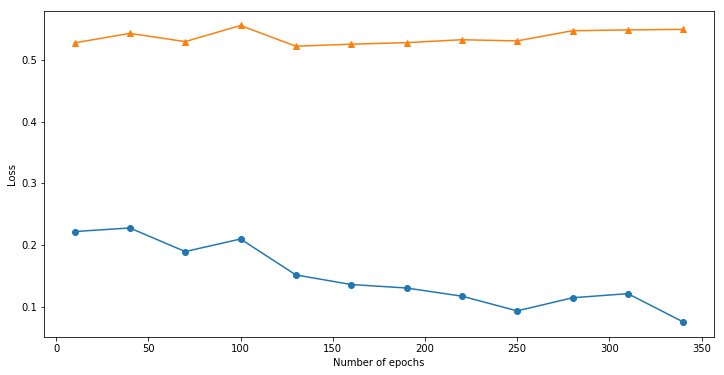

In [152]:
fig,ax=plt.subplots(1,1,figsize=(12,6))
plt.plot(epochs, training_loss, marker = "o")
plt.plot(epochs, testing_loss, marker = "^")
plt.xlabel('Number of epochs')
plt.ylabel('Loss')

##### Loss in test set doesnt decrease with increasing epochs. it starts increasing after epoch>130

In [136]:
# Hyper-parameter tuning
# Create a KerasRegressor
model = KerasRegressor(build_fn = create_model_dropout,
                       verbose = 0)
# Define the hyperparameter space
params = {
          'lr': [10,0.01, 0.001, 0.0001],
          'dropout':[0.2,0.3,0.4,0.5],
          'Lambda': [1e-5,1e-3,1e-1],
          'epochs':[10,50,100,130]
          }
# Create a randomize search cv object 
random_search = RandomizedSearchCV(model,
                                   param_distributions = params,
                                   n_jobs=-1)
random_search_results = random_search.fit(xs_train, y_train)

print("Best Score: ",
      random_search_results.best_score_,
      "and Best Params: ",
      random_search_results.best_params_)

Best Score:  -0.5550189435482025 and Best Params:  {'lr': 0.01, 'epochs': 130, 'dropout': 0.5, 'Lambda': 1e-05}


In [131]:
# call model with above params
lr=0.01
Lamda = 1e-5
dropout=0.5
epochs=130

model  = create_model_dropout(Lambda,dropout,lr,activation) # single interation. untrained model
model.fit(xs_train, y_train,epochs=epochs,verbose= 1) 
score = model.evaluate(xs_train, y_train, verbose=0)
print("mse,rmse:",score)

#calculate rsquared
y_pred = model.predict(xs_train)
pred = y_pred.ravel() # convert(R,1) to (R,)
r_square = coeff_determination(y_train.values,pred)
print("rsquared:",r_square)

Epoch 1/130
30/30 [==============================] - 1s 4ms/step - loss: 24.5445 - root_mean_squared_error: 4.9542
Epoch 2/130
30/30 [==============================] - 0s 4ms/step - loss: 5.6528 - root_mean_squared_error: 2.3776
Epoch 3/130
30/30 [==============================] - 0s 3ms/step - loss: 1.7642 - root_mean_squared_error: 1.3282
Epoch 4/130
30/30 [==============================] - 0s 4ms/step - loss: 1.3648 - root_mean_squared_error: 1.1682
Epoch 5/130
30/30 [==============================] - 0s 3ms/step - loss: 1.3204 - root_mean_squared_error: 1.1491
Epoch 6/130
30/30 [==============================] - 0s 3ms/step - loss: 1.2826 - root_mean_squared_error: 1.1325
Epoch 7/130
30/30 [==============================] - 0s 3ms/step - loss: 1.2283 - root_mean_squared_error: 1.1083
Epoch 8/130
30/30 [==============================] - 0s 4ms/step - loss: 1.2746 - root_mean_squared_error: 1.1290
Epoch 9/130
30/30 [==============================] - 0s 3ms/step - loss: 1.0924 - root_

30/30 [==============================] - 0s 3ms/step - loss: 0.5420 - root_mean_squared_error: 0.7362
Epoch 73/130
30/30 [==============================] - 0s 3ms/step - loss: 0.5530 - root_mean_squared_error: 0.7436
Epoch 74/130
30/30 [==============================] - 0s 3ms/step - loss: 0.5431 - root_mean_squared_error: 0.7369
Epoch 75/130
30/30 [==============================] - 0s 3ms/step - loss: 0.5486 - root_mean_squared_error: 0.7407
Epoch 76/130
30/30 [==============================] - 0s 3ms/step - loss: 0.5184 - root_mean_squared_error: 0.7200
Epoch 77/130
30/30 [==============================] - 0s 3ms/step - loss: 0.5363 - root_mean_squared_error: 0.7323
Epoch 78/130
30/30 [==============================] - 0s 3ms/step - loss: 0.5709 - root_mean_squared_error: 0.7556
Epoch 79/130
30/30 [==============================] - 0s 3ms/step - loss: 0.5365 - root_mean_squared_error: 0.7325
Epoch 80/130
30/30 [==============================] - 0s 3ms/step - loss: 0.5316 - root_mean_

In [153]:
score = model.evaluate(xs_test,y_test)
print("mse,rmse:",score)

#calculate rsquared
y_pred = model.predict(xs_test)
pred = y_pred.ravel() # convert(R,1) to (R,)
r_square = coeff_determination(y_test.values,pred)
print("rsquared:",r_square)

13/13 [==============================] - 0s 2ms/step - loss: 0.5495 - root_mean_squared_error: 0.7413
mse,rmse: [0.5494899153709412, 0.7412758469581604]
rsquared: 0.13798348602775246


##### There is considerable difference between training loss and testing loss possibly due to nature of dataset

##### 4. Pickle the model for future use.

In [154]:
# Pickling the final model
model_file = 'regression_model.sav'
model.save(model_file)

# load the model 
model_reg = load_model('regression_model.sav')
y_pred = model_reg.predict(xs_test)
pred = y_pred.ravel() # convert(R,1) to (R,)
r_square = coeff_determination(y_test.values,pred)
print("rsquared:",r_square)

INFO:tensorflow:Assets written to: regression_model.sav\assets
rsquared: 0.13798348602775246


##### Summary

<br>
1.Created model with weight initialization, batch normalisation and dropout. Applied parameter tuning using KerasRegressor wrapper class and RandomizedSearchCV and determined epochs that is good enough to give us better accuracy in validation dataset 
<br>
2. There is still a significant difference between train and test datasets. Using NN, we were able to overfit and improve significantly on train data but test dataset accuracy is not improving much
Increasing the sample size to cover various scenarios could help us train a better model

##### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# PART - TWO

<b>DOMAIN: </b> Autonomous Vehicles

<b> BUSINESS CONTEXT: </b> A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic
example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic
images.
The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address
helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising numbers in photographs is a problem of interest
to the optical character recognition community.
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This
difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character
arrangements.
The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition
factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain
some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

<b> DATA DESCRIPTION: </b> The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on
data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and numbers in natural scene images). SVHN is obtained
from house numbers in Google Street View images.
Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.The dataset has been provided in the form of h5py files.

<b> PROJECT OBJECTIVE: </b> We will build a digit classifier on the SVHN (Street View Housing Number) dataset

<b> Steps and tasks: </b>

##### 1. Import the data.

In [74]:
# imports

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import h5py
import pickle

from statistics import mean

from sklearn.model_selection import RandomizedSearchCV, cross_val_score,StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
#tensorflow
import tensorflow
tensorflow.__version__

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation
from tensorflow.keras import regularizers #for l2 regularization
from tensorflow.keras.optimizers import Adam   #for adam optimizer
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import backend as bk
from tensorflow.keras.models import load_model

In [2]:
# read input file

data = h5py.File('Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')
print(data.keys())

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


In [3]:
# read the values into numpy arrays
x_train=data.get('X_train').value
print(x_train.shape,type(x_train))

C:\ProgramData\Anaconda3\lib\site-packages\h5py\_hl\dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


(42000, 32, 32) <class 'numpy.ndarray'>


In [4]:
# read the values into numpy arrays
x_val=data.get('X_val').value
print(x_val.shape,type(x_val))

(60000, 32, 32) <class 'numpy.ndarray'>


C:\ProgramData\Anaconda3\lib\site-packages\h5py\_hl\dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [5]:
# read the values into numpy arrays
x_test=data.get('X_test').value
print(x_test.shape,type(x_test))

(18000, 32, 32) <class 'numpy.ndarray'>


C:\ProgramData\Anaconda3\lib\site-packages\h5py\_hl\dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [6]:
# read the values into numpy arrays
y_train=data.get('y_train').value
print(y_train.shape,type(y_train))

(42000,) <class 'numpy.ndarray'>


C:\ProgramData\Anaconda3\lib\site-packages\h5py\_hl\dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [7]:
# read the values into numpy arrays
y_test=data.get('y_test').value
print(y_test.shape,type(y_test))

(18000,) <class 'numpy.ndarray'>


C:\ProgramData\Anaconda3\lib\site-packages\h5py\_hl\dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [8]:
# read the values into numpy arrays
y_val=data.get('y_val').value
print(y_val.shape,type(y_val))

(60000,) <class 'numpy.ndarray'>


C:\ProgramData\Anaconda3\lib\site-packages\h5py\_hl\dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


##### total 60000 images, split into 70% train and 30% test

In [9]:
#flatten numpy array
x_train_flat = x_train.reshape((42000, 32*32))
x_train_flat.shape

(42000, 1024)

In [10]:
#flatten numpy array
x_test_flat = x_test.reshape((18000, 32*32))
x_test_flat.shape

(18000, 1024)

In [11]:
#concatenate x_train with class labels
p_data =pd.concat([pd.DataFrame(x_train_flat),pd.DataFrame(y_train,columns=['Target'])],axis=1) #concatenate inputs with labels to create a single dataset
p_data.shape

(42000, 1025)

In [12]:
p_data.sample(5) # check sample data

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,Target
36918,81.511497,79.266701,79.021698,85.363098,82.776299,80.178703,75.478104,73.304199,71.190399,57.305801,...,40.116299,42.632198,40.159401,35.518902,26.302601,22.558800,39.916100,63.756599,81.939697,9
13624,196.810699,196.810699,196.810699,196.810699,196.810699,196.810699,197.810593,198.810501,197.810593,198.810501,...,195.283905,197.810593,198.810501,196.810699,198.810501,199.810394,200.810303,201.810196,202.810104,8
18254,149.054199,149.869202,151.157196,151.744202,148.630493,146.929596,149.815308,151.815094,151.815094,149.815308,...,163.069794,161.070007,160.070099,159.184204,159.412201,159.053207,159.808105,160.623093,161.025208,9
28460,111.788498,102.088402,95.501999,97.555702,100.256500,97.484802,96.071999,90.713501,83.529297,88.702904,...,84.802002,73.987999,77.286598,85.698700,81.927101,73.052803,65.939499,66.341599,67.683502,2
31342,215.651703,215.651703,217.651505,218.651398,215.651703,221.651093,228.650406,222.651001,216.651596,216.651596,...,222.939102,221.939194,222.939102,223.938995,224.237900,221.651093,220.651199,219.651306,218.651398,3


In [13]:
#scale input variables
scale = StandardScaler()

# fit with train data
xs_train = pd.DataFrame(scale.fit_transform(x_train_flat))

# apply mean and std.dev of train data to test data using transform
xs_test = pd.DataFrame(scale.transform(x_test_flat))

In [14]:
unique,counts = np.unique(y_train, return_counts=True)
print (np.asarray((unique, counts)).T)

[[   0 4186]
 [   1 4172]
 [   2 4197]
 [   3 4281]
 [   4 4188]
 [   5 4232]
 [   6 4168]
 [   7 4192]
 [   8 4188]
 [   9 4196]]


##### Target values range from 0-9 and there is no imbalance

label for each of the below image: 2
label for each of the below image: 6
label for each of the below image: 7
label for each of the below image: 4
label for each of the below image: 4
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 7
label for each of the below image: 3


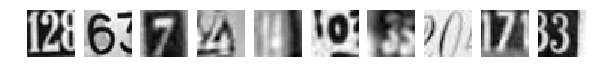

In [15]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (y_train[i]))
plt.show()

##### Images are quite blurred and there is more noise in the data.

In [16]:
# Creates a model with 1 input layer, 2 hidden layers and 1 output layer (10 nodes)
def cr_model(Lambda,dropout=0.2,lr=0.01,activation = 'relu',verb=True):
  
    #initialize
    hidden_nodes = 256    
    output_nodes = 10
    
    # Create an Adam optimizer with the given learning rate
    opt = Adam(lr=lr)
  
    # Create FNN model  
    model = Sequential()
    
    #1 hidden layer
    model.add(Dense(units = hidden_nodes, 
                    input_shape = ((32*32),), 
                    kernel_regularizer = regularizers.l2(Lambda), # regularization
                    kernel_initializer='he_normal' # added weight initializer
                   )
             ) 
    model.add(BatchNormalization()) # normalize before activation
    model.add(Activation(activation)) #Activation
    model.add(Dropout(dropout)) # added dropout
    
    #2nd  hidden layer
    model.add(Dense(units = hidden_nodes, 
                   kernel_regularizer = regularizers.l2(Lambda), # regularization
                   kernel_initializer='he_normal'  # added weight initializer
                   )
             ) 
    
    model.add(BatchNormalization()) # normalize before activation
    model.add(Activation(activation)) #Activation
    model.add(Dropout(dropout)) # added dropout

   
    # output layer with softmax activation
    model.add(Dense(output_nodes,activation='softmax', kernel_regularizer = regularizers.l2(Lambda)))
    # Compile the model
    model.compile(optimizer = opt,
                  loss = 'sparse_categorical_crossentropy', # large dataset.. so using sparse loss
                  metrics=['accuracy'])
    return model

In [17]:
Lambda = 0
dropout = 0.2
lr = 0.00001
activation = 'relu'
model = cr_model(Lambda,dropout,lr,activation)
model.fit(xs_train,y_train,epochs=1,batch_size=1000,verbose= 1) 
score = model.evaluate(xs_train, y_train, verbose=0)
print(score)

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


42/42 [==============================] - 8s 28ms/step - loss: 2.7584 - accuracy: 0.1035
[2.6433541774749756, 0.1079285740852356]


##### increase lambda

In [18]:
Lambda = 1e3
dropout = 0.2
lr = 0.00001
activation = 'relu'
model = cr_model(Lambda,dropout,lr,activation)
model.fit(xs_train,y_train,epochs=1,batch_size=1000,verbose= 1) 
score = model.evaluate(xs_train, y_train, verbose=0)
print(score)

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


42/42 [==============================] - 2s 31ms/step - loss: 1036643.8750 - accuracy: 0.0969
[1030479.5625, 0.10028571635484695]


##### Loss has exploded as Lambda is high

In [40]:
# fit a portion of training data
xs_train_subset = xs_train[0:20]
y_train_subset = y_train[0:20]

Lambda = 0
dropout = 0.2
lr = 0.00001
activation = 'relu'
model = cr_model(Lambda,dropout,lr,activation)
model.fit(xs_train_subset,y_train_subset,epochs=300,batch_size=1000,verbose= 1) 
score = model.evaluate(xs_train_subset,y_train_subset, verbose=0)
print(score)


Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 2.9009 - accuracy: 0.1000
Epoch 2/300
1/1 [==============================] - 0s 16ms/step - loss: 3.0290 - accuracy: 0.0500
Epoch 3/300
1/1 [==============================] - 0s 11ms/step - loss: 2.8846 - accuracy: 0.1000
Epoch 4/300
1/1 [==============================] - 0s 10ms/step - loss: 3.0001 - accuracy: 0.1000
Epoch 5/300
1/1 [==============================] - 0s 10ms/step - loss: 2.8201 - accuracy: 0.1000
Epoch 6/300
1/1 [==============================] - 0s 9ms/step - loss: 2.9590 - accuracy: 0.1000
Epoch 7/300
1/1 [==============================] - 0s 11ms/step - loss: 2.6576 - accuracy: 0.2000
Epoch 8/300
1/1 [==============================] - 0s 8ms/step - loss: 3.0463 - accuracy: 0.0500
Epoch 9/300
1/1 [==============================] - 0s 9ms/step - loss: 2.7596 - accuracy: 0.1500
Epoch 10/300
1/1 [==============================] - 0s 10ms/step - loss: 2.7006 - accuracy: 0.1000
Epoch 11/300
1/1 [======

1/1 [==============================] - 0s 8ms/step - loss: 2.0040 - accuracy: 0.3500
Epoch 85/300
1/1 [==============================] - 0s 8ms/step - loss: 1.6911 - accuracy: 0.6000
Epoch 86/300
1/1 [==============================] - 0s 7ms/step - loss: 1.8914 - accuracy: 0.3000
Epoch 87/300
1/1 [==============================] - 0s 10ms/step - loss: 1.9918 - accuracy: 0.3000
Epoch 88/300
1/1 [==============================] - 0s 7ms/step - loss: 1.9206 - accuracy: 0.4000
Epoch 89/300
1/1 [==============================] - 0s 8ms/step - loss: 1.8874 - accuracy: 0.3000
Epoch 90/300
1/1 [==============================] - 0s 11ms/step - loss: 1.8519 - accuracy: 0.3500
Epoch 91/300
1/1 [==============================] - 0s 10ms/step - loss: 1.8517 - accuracy: 0.4000
Epoch 92/300
1/1 [==============================] - 0s 6ms/step - loss: 1.8454 - accuracy: 0.4000
Epoch 93/300
1/1 [==============================] - 0s 6ms/step - loss: 1.9547 - accuracy: 0.3000
Epoch 94/300
1/1 [============

1/1 [==============================] - 0s 7ms/step - loss: 1.1600 - accuracy: 0.7500
Epoch 167/300
1/1 [==============================] - 0s 12ms/step - loss: 1.1668 - accuracy: 0.5500
Epoch 168/300
1/1 [==============================] - 0s 10ms/step - loss: 1.2674 - accuracy: 0.7000
Epoch 169/300
1/1 [==============================] - 0s 6ms/step - loss: 1.3074 - accuracy: 0.6500
Epoch 170/300
1/1 [==============================] - 0s 10ms/step - loss: 1.1413 - accuracy: 0.6500
Epoch 171/300
1/1 [==============================] - 0s 9ms/step - loss: 1.1338 - accuracy: 0.7000
Epoch 172/300
1/1 [==============================] - 0s 6ms/step - loss: 1.1298 - accuracy: 0.7500
Epoch 173/300
1/1 [==============================] - 0s 7ms/step - loss: 1.2091 - accuracy: 0.7500
Epoch 174/300
1/1 [==============================] - 0s 6ms/step - loss: 1.1820 - accuracy: 0.7000
Epoch 175/300
1/1 [==============================] - 0s 6ms/step - loss: 1.4615 - accuracy: 0.4000
Epoch 176/300
1/1 [==

1/1 [==============================] - 0s 7ms/step - loss: 0.8028 - accuracy: 0.9500
Epoch 249/300
1/1 [==============================] - 0s 9ms/step - loss: 0.9363 - accuracy: 0.8000
Epoch 250/300
1/1 [==============================] - 0s 7ms/step - loss: 0.7266 - accuracy: 0.9000
Epoch 251/300
1/1 [==============================] - 0s 7ms/step - loss: 0.8797 - accuracy: 0.8000
Epoch 252/300
1/1 [==============================] - 0s 9ms/step - loss: 0.7047 - accuracy: 0.8500
Epoch 253/300
1/1 [==============================] - 0s 7ms/step - loss: 0.7654 - accuracy: 0.9500
Epoch 254/300
1/1 [==============================] - 0s 6ms/step - loss: 0.8455 - accuracy: 0.8000
Epoch 255/300
1/1 [==============================] - 0s 9ms/step - loss: 0.7567 - accuracy: 0.9000
Epoch 256/300
1/1 [==============================] - 0s 8ms/step - loss: 0.8258 - accuracy: 0.8500
Epoch 257/300
1/1 [==============================] - 0s 7ms/step - loss: 0.8504 - accuracy: 0.8500
Epoch 258/300
1/1 [=====

##### Model could be overfitted to a small sample

In [42]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-7.0, 1.0))
    Lambda = math.pow(10, np.random.uniform(-7,-2))
    model.fit(xs_train,y_train,epochs=100,batch_size=1000,verbose= 1) 
    score = model.evaluate(xs_train,y_train,verbose=0)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, score[1], lr, Lambda))

Epoch 1/100
42/42 [==============================] - 1s 25ms/step - loss: 0.8725 - accuracy: 0.7368
Epoch 2/100
42/42 [==============================] - 1s 25ms/step - loss: 0.8688 - accuracy: 0.7379
Epoch 3/100
42/42 [==============================] - 1s 24ms/step - loss: 0.8694 - accuracy: 0.7367
Epoch 4/100
42/42 [==============================] - 1s 25ms/step - loss: 0.8624 - accuracy: 0.7404
Epoch 5/100
42/42 [==============================] - 1s 25ms/step - loss: 0.8606 - accuracy: 0.7400
Epoch 6/100
42/42 [==============================] - 1s 25ms/step - loss: 0.8559 - accuracy: 0.7411
Epoch 7/100
42/42 [==============================] - 1s 25ms/step - loss: 0.8547 - accuracy: 0.7436
Epoch 8/100
42/42 [==============================] - 1s 25ms/step - loss: 0.8565 - accuracy: 0.7419
Epoch 9/100
42/42 [==============================] - 1s 25ms/step - loss: 0.8532 - accuracy: 0.7436
Epoch 10/100
42/42 [==============================] - 1s 25ms/step - loss: 0.8543 - accuracy: 0.7418

42/42 [==============================] - 1s 24ms/step - loss: 0.7414 - accuracy: 0.7739
Epoch 82/100
42/42 [==============================] - 1s 25ms/step - loss: 0.7407 - accuracy: 0.7740
Epoch 83/100
42/42 [==============================] - 1s 24ms/step - loss: 0.7374 - accuracy: 0.7743
Epoch 84/100
42/42 [==============================] - 1s 24ms/step - loss: 0.7358 - accuracy: 0.7765
Epoch 85/100
42/42 [==============================] - 1s 24ms/step - loss: 0.7361 - accuracy: 0.7754
Epoch 86/100
42/42 [==============================] - 1s 24ms/step - loss: 0.7362 - accuracy: 0.7754
Epoch 87/100
42/42 [==============================] - 1s 25ms/step - loss: 0.7292 - accuracy: 0.7779
Epoch 88/100
42/42 [==============================] - 1s 25ms/step - loss: 0.7319 - accuracy: 0.7784
Epoch 89/100
42/42 [==============================] - 1s 27ms/step - loss: 0.7327 - accuracy: 0.7790
Epoch 90/100
42/42 [==============================] - 1s 22ms/step - loss: 0.7297 - accuracy: 0.7775
Epo

42/42 [==============================] - 1s 24ms/step - loss: 0.6587 - accuracy: 0.7981
Epoch 62/100
42/42 [==============================] - 1s 24ms/step - loss: 0.6573 - accuracy: 0.7986
Epoch 63/100
42/42 [==============================] - 1s 24ms/step - loss: 0.6599 - accuracy: 0.7990
Epoch 64/100
42/42 [==============================] - 1s 25ms/step - loss: 0.6558 - accuracy: 0.7993 0s - loss: 0
Epoch 65/100
42/42 [==============================] - 1s 24ms/step - loss: 0.6541 - accuracy: 0.8001
Epoch 66/100
42/42 [==============================] - 1s 24ms/step - loss: 0.6576 - accuracy: 0.7981
Epoch 67/100
42/42 [==============================] - 1s 25ms/step - loss: 0.6517 - accuracy: 0.7977
Epoch 68/100
42/42 [==============================] - 1s 24ms/step - loss: 0.6529 - accuracy: 0.8018
Epoch 69/100
42/42 [==============================] - 1s 24ms/step - loss: 0.6548 - accuracy: 0.7991
Epoch 70/100
42/42 [==============================] - 1s 24ms/step - loss: 0.6504 - accurac

42/42 [==============================] - 1s 25ms/step - loss: 0.6063 - accuracy: 0.8141
Epoch 42/100
42/42 [==============================] - 1s 24ms/step - loss: 0.6026 - accuracy: 0.8144
Epoch 43/100
42/42 [==============================] - 1s 25ms/step - loss: 0.5989 - accuracy: 0.8155
Epoch 44/100
42/42 [==============================] - 1s 23ms/step - loss: 0.5998 - accuracy: 0.8170
Epoch 45/100
42/42 [==============================] - 1s 25ms/step - loss: 0.6023 - accuracy: 0.8158
Epoch 46/100
42/42 [==============================] - 1s 24ms/step - loss: 0.6003 - accuracy: 0.8151
Epoch 47/100
42/42 [==============================] - 1s 24ms/step - loss: 0.5973 - accuracy: 0.8180
Epoch 48/100
42/42 [==============================] - 1s 25ms/step - loss: 0.6010 - accuracy: 0.8154
Epoch 49/100
42/42 [==============================] - 1s 24ms/step - loss: 0.5983 - accuracy: 0.8155
Epoch 50/100
42/42 [==============================] - 1s 24ms/step - loss: 0.5980 - accuracy: 0.8176
Epo

Epoch 21/100
42/42 [==============================] - 1s 24ms/step - loss: 0.5621 - accuracy: 0.8280
Epoch 22/100
42/42 [==============================] - 1s 24ms/step - loss: 0.5571 - accuracy: 0.8281
Epoch 23/100
42/42 [==============================] - 1s 25ms/step - loss: 0.5570 - accuracy: 0.8283
Epoch 24/100
42/42 [==============================] - 1s 24ms/step - loss: 0.5567 - accuracy: 0.8293
Epoch 25/100
42/42 [==============================] - 1s 24ms/step - loss: 0.5552 - accuracy: 0.8285
Epoch 26/100
42/42 [==============================] - 1s 23ms/step - loss: 0.5567 - accuracy: 0.8269
Epoch 27/100
42/42 [==============================] - 1s 23ms/step - loss: 0.5521 - accuracy: 0.8301
Epoch 28/100
42/42 [==============================] - 1s 24ms/step - loss: 0.5564 - accuracy: 0.8299
Epoch 29/100
42/42 [==============================] - 1s 24ms/step - loss: 0.5532 - accuracy: 0.8283
Epoch 30/100
42/42 [==============================] - 1s 24ms/step - loss: 0.5562 - accurac

42/42 [==============================] - 1s 22ms/step - loss: 0.5262 - accuracy: 0.8370
Epoch 2/100
42/42 [==============================] - 1s 21ms/step - loss: 0.5255 - accuracy: 0.8373 0s - loss: 0.5149 
Epoch 3/100
42/42 [==============================] - 1s 23ms/step - loss: 0.5214 - accuracy: 0.8397
Epoch 4/100
42/42 [==============================] - 1s 22ms/step - loss: 0.5221 - accuracy: 0.8385
Epoch 5/100
42/42 [==============================] - 1s 22ms/step - loss: 0.5230 - accuracy: 0.8398
Epoch 6/100
42/42 [==============================] - 1s 27ms/step - loss: 0.5190 - accuracy: 0.8401
Epoch 7/100
42/42 [==============================] - 1s 23ms/step - loss: 0.5189 - accuracy: 0.8396
Epoch 8/100
42/42 [==============================] - 1s 25ms/step - loss: 0.5209 - accuracy: 0.8389
Epoch 9/100
42/42 [==============================] - 1s 24ms/step - loss: 0.5200 - accuracy: 0.8395
Epoch 10/100
42/42 [==============================] - 1s 25ms/step - loss: 0.5224 - accuracy:

42/42 [==============================] - 1s 24ms/step - loss: 0.4975 - accuracy: 0.8456
Epoch 83/100
42/42 [==============================] - 1s 25ms/step - loss: 0.4966 - accuracy: 0.8465
Epoch 84/100
42/42 [==============================] - 1s 29ms/step - loss: 0.4978 - accuracy: 0.8466
Epoch 85/100
42/42 [==============================] - 1s 26ms/step - loss: 0.4949 - accuracy: 0.8456
Epoch 86/100
42/42 [==============================] - 1s 25ms/step - loss: 0.4954 - accuracy: 0.8475
Epoch 87/100
42/42 [==============================] - 1s 25ms/step - loss: 0.4918 - accuracy: 0.8475
Epoch 88/100
42/42 [==============================] - 1s 24ms/step - loss: 0.4939 - accuracy: 0.8475
Epoch 89/100
42/42 [==============================] - 1s 25ms/step - loss: 0.4934 - accuracy: 0.8483
Epoch 90/100
42/42 [==============================] - 1s 24ms/step - loss: 0.4957 - accuracy: 0.8460
Epoch 91/100
42/42 [==============================] - 1s 25ms/step - loss: 0.4923 - accuracy: 0.8461
Epo

42/42 [==============================] - 1s 26ms/step - loss: 0.4701 - accuracy: 0.8538
Epoch 62/100
42/42 [==============================] - 1s 26ms/step - loss: 0.4700 - accuracy: 0.8531
Epoch 63/100
42/42 [==============================] - 1s 26ms/step - loss: 0.4716 - accuracy: 0.8534
Epoch 64/100
42/42 [==============================] - 1s 26ms/step - loss: 0.4750 - accuracy: 0.8547
Epoch 65/100
42/42 [==============================] - 1s 26ms/step - loss: 0.4699 - accuracy: 0.8551
Epoch 66/100
42/42 [==============================] - 1s 27ms/step - loss: 0.4738 - accuracy: 0.8533
Epoch 67/100
42/42 [==============================] - 1s 26ms/step - loss: 0.4704 - accuracy: 0.8555 0s - loss:
Epoch 68/100
42/42 [==============================] - 1s 27ms/step - loss: 0.4695 - accuracy: 0.8534
Epoch 69/100
42/42 [==============================] - 1s 27ms/step - loss: 0.4700 - accuracy: 0.8525
Epoch 70/100
42/42 [==============================] - 1s 28ms/step - loss: 0.4678 - accuracy:

42/42 [==============================] - 1s 25ms/step - loss: 0.4527 - accuracy: 0.8589
Epoch 41/100
42/42 [==============================] - 1s 26ms/step - loss: 0.4496 - accuracy: 0.8597
Epoch 42/100
42/42 [==============================] - 1s 25ms/step - loss: 0.4477 - accuracy: 0.8611
Epoch 43/100
42/42 [==============================] - 1s 26ms/step - loss: 0.4501 - accuracy: 0.8577
Epoch 44/100
42/42 [==============================] - 1s 26ms/step - loss: 0.4506 - accuracy: 0.8604
Epoch 45/100
42/42 [==============================] - 1s 26ms/step - loss: 0.4548 - accuracy: 0.8579
Epoch 46/100
42/42 [==============================] - 1s 27ms/step - loss: 0.4514 - accuracy: 0.8601
Epoch 47/100
42/42 [==============================] - 1s 28ms/step - loss: 0.4472 - accuracy: 0.8627
Epoch 48/100
42/42 [==============================] - 1s 33ms/step - loss: 0.4451 - accuracy: 0.8612
Epoch 49/100
42/42 [==============================] - 1s 28ms/step - loss: 0.4487 - accuracy: 0.8602
Epo

42/42 [==============================] - 1s 24ms/step - loss: 0.4361 - accuracy: 0.8638
Epoch 20/100
42/42 [==============================] - 1s 23ms/step - loss: 0.4346 - accuracy: 0.8660
Epoch 21/100
42/42 [==============================] - 1s 23ms/step - loss: 0.4352 - accuracy: 0.8639
Epoch 22/100
42/42 [==============================] - 1s 24ms/step - loss: 0.4309 - accuracy: 0.8654
Epoch 23/100
42/42 [==============================] - 1s 23ms/step - loss: 0.4305 - accuracy: 0.8662
Epoch 24/100
42/42 [==============================] - 1s 24ms/step - loss: 0.4298 - accuracy: 0.8670
Epoch 25/100
42/42 [==============================] - 1s 23ms/step - loss: 0.4328 - accuracy: 0.8653
Epoch 26/100
42/42 [==============================] - 1s 23ms/step - loss: 0.4323 - accuracy: 0.8655
Epoch 27/100
42/42 [==============================] - 1s 24ms/step - loss: 0.4322 - accuracy: 0.8654
Epoch 28/100
42/42 [==============================] - 1s 23ms/step - loss: 0.4309 - accuracy: 0.8662
Epo

42/42 [==============================] - 1s 24ms/step - loss: 0.4149 - accuracy: 0.8694
Try 8/100: Best_val_acc: 0.9260237812995911, lr: 0.003066657831636474, Lambda: 1.023313401430778e-06

Epoch 1/100
42/42 [==============================] - 1s 24ms/step - loss: 0.4169 - accuracy: 0.8689
Epoch 2/100
42/42 [==============================] - 1s 23ms/step - loss: 0.4157 - accuracy: 0.8698
Epoch 3/100
42/42 [==============================] - 1s 23ms/step - loss: 0.4145 - accuracy: 0.8688
Epoch 4/100
42/42 [==============================] - 1s 23ms/step - loss: 0.4143 - accuracy: 0.8690
Epoch 5/100
42/42 [==============================] - 1s 24ms/step - loss: 0.4164 - accuracy: 0.8695
Epoch 6/100
42/42 [==============================] - 1s 23ms/step - loss: 0.4148 - accuracy: 0.8695
Epoch 7/100
42/42 [==============================] - 1s 23ms/step - loss: 0.4110 - accuracy: 0.8732
Epoch 8/100
42/42 [==============================] - 1s 23ms/step - loss: 0.4143 - accuracy: 0.8692
Epoch 9/10

Epoch 80/100
42/42 [==============================] - 1s 24ms/step - loss: 0.4002 - accuracy: 0.8762
Epoch 81/100
42/42 [==============================] - 1s 23ms/step - loss: 0.4029 - accuracy: 0.8714
Epoch 82/100
42/42 [==============================] - 1s 24ms/step - loss: 0.4009 - accuracy: 0.8735
Epoch 83/100
42/42 [==============================] - 1s 23ms/step - loss: 0.4000 - accuracy: 0.8746
Epoch 84/100
42/42 [==============================] - 1s 23ms/step - loss: 0.4013 - accuracy: 0.8749
Epoch 85/100
42/42 [==============================] - 1s 23ms/step - loss: 0.4060 - accuracy: 0.8724
Epoch 86/100
42/42 [==============================] - 1s 23ms/step - loss: 0.3983 - accuracy: 0.8737
Epoch 87/100
42/42 [==============================] - 1s 23ms/step - loss: 0.4012 - accuracy: 0.8745
Epoch 88/100
42/42 [==============================] - 1s 23ms/step - loss: 0.3992 - accuracy: 0.8750
Epoch 89/100
42/42 [==============================] - 1s 24ms/step - loss: 0.4003 - accurac

##### Below combinations are giving better accuracies
<br>
lr =1e-3, Lamda=1e-3,1e-6 have given better accuracies


In [ ]:
# Hyper-parameter tuning
# Create a KerasClassifier
model_wrapper = KerasClassifier(build_fn = cr_model,
                        batch_size=1000,                        
                        epochs=10,
                       verbose = 0)
# Define the hyperparameter space
params = {
          'lr': [10,1e-3,1e-5,1e-7],
          'dropout':[0.2,0.3,0.4,0.5],
          'Lambda': [1e-1,1e-3,1e-5],
          }
# Create a randomize search cv object 
random_search = RandomizedSearchCV(model,
                                   param_distributions = params,
                                   n_jobs=-1)
random_search_results = random_search.fit(xs_train, y_train)

print("Best Score: ",
      random_search_results.best_score_,
      "and Best Params: ",
      random_search_results.best_params_)

##### Above wrapper would take significant amount of time with limited processing resources. Hence, using the lr and Lamda rates figured during trial and error method

In [55]:
# Perform cross validation. Wrote this function as KerasClassifier wrapper over cross_val_score was giving issues
def cross_validation(x,y,model):
    """
        This function performs cross validation using StratifiedKFold. Splits the dataset into 5 and calculates average accuracy.
        
        Returns None
        
    """
    # Using StratifiedKFold for cross validation. Stratified to keep class in similar proprotions in train and test
    cv=StratifiedKFold(n_splits=5)
    avg_train_accuracy=[]
    avg_test_accuracy=[]

    for train_index, test_index in cv.split(x, y): 
        x_train, x_test = x.iloc[train_index,:], x.iloc[test_index,:]
        y_train, y_test = y[train_index], y[test_index]

        #get metrics
        model.fit(x_train,y_train,epochs=100,batch_size=1000,verbose= 1) # try for various epochs
        train_score = model.evaluate(x_train, y_train, verbose=0) # train_score
        test_score = model.evaluate(x_test, y_test, verbose=0) # train_score

        # append metrics
        avg_train_accuracy.append(train_score[1])
        avg_test_accuracy.append(test_score[1])

    print("Train accuracy:",avg_train_accuracy)
    print("Mean Train accuracy:",mean(avg_train_accuracy))
    
    print("Test accuracy:",avg_test_accuracy)
    print("Mean test accuracy:",mean(avg_test_accuracy))   

In [56]:
Lambda = 1e-3
dropout = 0.2
lr = 1e-3
activation = 'relu'

model = cr_model(Lambda,dropout,lr,activation)
cross_validation(xs_train,y_train,model) 

Epoch 1/100
34/34 [==============================] - 2s 27ms/step - loss: 3.0496 - accuracy: 0.3025
Epoch 2/100
34/34 [==============================] - 1s 25ms/step - loss: 2.2468 - accuracy: 0.5822
Epoch 3/100
34/34 [==============================] - 1s 26ms/step - loss: 1.9095 - accuracy: 0.6683
Epoch 4/100
34/34 [==============================] - 1s 27ms/step - loss: 1.7175 - accuracy: 0.7055
Epoch 5/100
34/34 [==============================] - 1s 26ms/step - loss: 1.5575 - accuracy: 0.7343
Epoch 6/100
34/34 [==============================] - 1s 26ms/step - loss: 1.4356 - accuracy: 0.7531
Epoch 7/100
34/34 [==============================] - 1s 27ms/step - loss: 1.3573 - accuracy: 0.7598
Epoch 8/100
34/34 [==============================] - 1s 25ms/step - loss: 1.2564 - accuracy: 0.7785
Epoch 9/100
34/34 [==============================] - 1s 27ms/step - loss: 1.1959 - accuracy: 0.7829
Epoch 10/100
34/34 [==============================] - 1s 29ms/step - loss: 1.1228 - accuracy: 0.7943

34/34 [==============================] - 1s 27ms/step - loss: 0.5383 - accuracy: 0.8813
Epoch 81/100
34/34 [==============================] - 1s 27ms/step - loss: 0.5308 - accuracy: 0.8821
Epoch 82/100
34/34 [==============================] - 1s 27ms/step - loss: 0.5338 - accuracy: 0.8821
Epoch 83/100
34/34 [==============================] - 1s 37ms/step - loss: 0.5386 - accuracy: 0.8792
Epoch 84/100
34/34 [==============================] - 1s 35ms/step - loss: 0.5455 - accuracy: 0.8779
Epoch 85/100
34/34 [==============================] - 1s 39ms/step - loss: 0.5438 - accuracy: 0.8770
Epoch 86/100
34/34 [==============================] - 1s 30ms/step - loss: 0.5419 - accuracy: 0.8804
Epoch 87/100
34/34 [==============================] - 1s 29ms/step - loss: 0.5402 - accuracy: 0.8804
Epoch 88/100
34/34 [==============================] - 1s 31ms/step - loss: 0.5214 - accuracy: 0.8859
Epoch 89/100
34/34 [==============================] - 1s 32ms/step - loss: 0.5292 - accuracy: 0.8825
Epo

34/34 [==============================] - 1s 22ms/step - loss: 0.5237 - accuracy: 0.8839
Epoch 60/100
34/34 [==============================] - 1s 22ms/step - loss: 0.5087 - accuracy: 0.8876
Epoch 61/100
34/34 [==============================] - 1s 22ms/step - loss: 0.5075 - accuracy: 0.8883
Epoch 62/100
34/34 [==============================] - 1s 22ms/step - loss: 0.5125 - accuracy: 0.8869
Epoch 63/100
34/34 [==============================] - 1s 22ms/step - loss: 0.5143 - accuracy: 0.8869
Epoch 64/100
34/34 [==============================] - 1s 22ms/step - loss: 0.5100 - accuracy: 0.8865
Epoch 65/100
34/34 [==============================] - 1s 31ms/step - loss: 0.5021 - accuracy: 0.8908
Epoch 66/100
34/34 [==============================] - 1s 25ms/step - loss: 0.5212 - accuracy: 0.8834
Epoch 67/100
34/34 [==============================] - 1s 25ms/step - loss: 0.5148 - accuracy: 0.8873
Epoch 68/100
34/34 [==============================] - 1s 26ms/step - loss: 0.5097 - accuracy: 0.8906
Epo

Epoch 39/100
34/34 [==============================] - 1s 25ms/step - loss: 0.4965 - accuracy: 0.8918
Epoch 40/100
34/34 [==============================] - 1s 26ms/step - loss: 0.5000 - accuracy: 0.8913
Epoch 41/100
34/34 [==============================] - 1s 26ms/step - loss: 0.4977 - accuracy: 0.8911
Epoch 42/100
34/34 [==============================] - 1s 25ms/step - loss: 0.5230 - accuracy: 0.8829
Epoch 43/100
34/34 [==============================] - 1s 26ms/step - loss: 0.5183 - accuracy: 0.8846
Epoch 44/100
34/34 [==============================] - 1s 25ms/step - loss: 0.5050 - accuracy: 0.8888
Epoch 45/100
34/34 [==============================] - 1s 26ms/step - loss: 0.5007 - accuracy: 0.8920
Epoch 46/100
34/34 [==============================] - 1s 25ms/step - loss: 0.5159 - accuracy: 0.8849
Epoch 47/100
34/34 [==============================] - 1s 25ms/step - loss: 0.5089 - accuracy: 0.8886
Epoch 48/100
34/34 [==============================] - 1s 26ms/step - loss: 0.5183 - accurac

34/34 [==============================] - 1s 22ms/step - loss: 0.5024 - accuracy: 0.8908
Epoch 20/100
34/34 [==============================] - 1s 22ms/step - loss: 0.5196 - accuracy: 0.8857
Epoch 21/100
34/34 [==============================] - 1s 22ms/step - loss: 0.5236 - accuracy: 0.8822
Epoch 22/100
34/34 [==============================] - 1s 22ms/step - loss: 0.4965 - accuracy: 0.8933
Epoch 23/100
34/34 [==============================] - 1s 22ms/step - loss: 0.5038 - accuracy: 0.8892
Epoch 24/100
34/34 [==============================] - 1s 22ms/step - loss: 0.5043 - accuracy: 0.8879
Epoch 25/100
34/34 [==============================] - 1s 22ms/step - loss: 0.5082 - accuracy: 0.8863
Epoch 26/100
34/34 [==============================] - 1s 23ms/step - loss: 0.5064 - accuracy: 0.8878
Epoch 27/100
34/34 [==============================] - 1s 26ms/step - loss: 0.5005 - accuracy: 0.8898
Epoch 28/100
34/34 [==============================] - 1s 25ms/step - loss: 0.5112 - accuracy: 0.8866
Epo

34/34 [==============================] - 1s 25ms/step - loss: 0.4878 - accuracy: 0.8956 0s - loss: 0.4889 - accu
Epoch 100/100
34/34 [==============================] - 1s 23ms/step - loss: 0.4957 - accuracy: 0.8910
Epoch 1/100
34/34 [==============================] - 1s 24ms/step - loss: 0.5775 - accuracy: 0.8701
Epoch 2/100
34/34 [==============================] - 1s 23ms/step - loss: 0.5516 - accuracy: 0.8774
Epoch 3/100
34/34 [==============================] - 1s 27ms/step - loss: 0.5381 - accuracy: 0.8793
Epoch 4/100
34/34 [==============================] - 1s 23ms/step - loss: 0.5335 - accuracy: 0.8817
Epoch 5/100
34/34 [==============================] - 1s 23ms/step - loss: 0.5195 - accuracy: 0.8847
Epoch 6/100
34/34 [==============================] - 1s 27ms/step - loss: 0.5267 - accuracy: 0.8821
Epoch 7/100
34/34 [==============================] - 1s 24ms/step - loss: 0.5368 - accuracy: 0.8782
Epoch 8/100
34/34 [==============================] - 1s 24ms/step - loss: 0.5176 - ac

34/34 [==============================] - 1s 25ms/step - loss: 0.4903 - accuracy: 0.8928
Epoch 80/100
34/34 [==============================] - 1s 25ms/step - loss: 0.4904 - accuracy: 0.8933
Epoch 81/100
34/34 [==============================] - 1s 27ms/step - loss: 0.5000 - accuracy: 0.8893
Epoch 82/100
34/34 [==============================] - 1s 29ms/step - loss: 0.4894 - accuracy: 0.8929
Epoch 83/100
34/34 [==============================] - 1s 28ms/step - loss: 0.5118 - accuracy: 0.8862
Epoch 84/100
34/34 [==============================] - 1s 27ms/step - loss: 0.5043 - accuracy: 0.8886
Epoch 85/100
34/34 [==============================] - 1s 27ms/step - loss: 0.4934 - accuracy: 0.8928
Epoch 86/100
34/34 [==============================] - ETA: 0s - loss: 0.4854 - accuracy: 0.89 - 1s 26ms/step - loss: 0.4865 - accuracy: 0.8945
Epoch 87/100
34/34 [==============================] - 1s 26ms/step - loss: 0.5108 - accuracy: 0.8869
Epoch 88/100
34/34 [==============================] - 1s 25ms/

##### Mean accuracy for validation set is 85% with very less variation

In [57]:
Lambda = 1e-6
dropout = 0.2
lr = 1e-3
activation = 'relu'

model = cr_model(Lambda,dropout,lr,activation)
cross_validation(xs_train,y_train,model) 

Epoch 1/100
34/34 [==============================] - 2s 29ms/step - loss: 2.0589 - accuracy: 0.2976
Epoch 2/100
34/34 [==============================] - 1s 26ms/step - loss: 1.3363 - accuracy: 0.5731
Epoch 3/100
34/34 [==============================] - 1s 23ms/step - loss: 1.0861 - accuracy: 0.6639
Epoch 4/100
34/34 [==============================] - 1s 22ms/step - loss: 0.9619 - accuracy: 0.7039
Epoch 5/100
34/34 [==============================] - 1s 22ms/step - loss: 0.8725 - accuracy: 0.7309
Epoch 6/100
34/34 [==============================] - 1s 22ms/step - loss: 0.8137 - accuracy: 0.7478
Epoch 7/100
34/34 [==============================] - 1s 24ms/step - loss: 0.7726 - accuracy: 0.7593
Epoch 8/100
34/34 [==============================] - 1s 23ms/step - loss: 0.7350 - accuracy: 0.7714
Epoch 9/100
34/34 [==============================] - 1s 22ms/step - loss: 0.6970 - accuracy: 0.7834
Epoch 10/100
34/34 [==============================] - 1s 24ms/step - loss: 0.6672 - accuracy: 0.7957

34/34 [==============================] - 1s 23ms/step - loss: 0.2691 - accuracy: 0.9115
Epoch 82/100
34/34 [==============================] - 1s 23ms/step - loss: 0.2711 - accuracy: 0.9124
Epoch 83/100
34/34 [==============================] - 1s 25ms/step - loss: 0.2756 - accuracy: 0.9101
Epoch 84/100
34/34 [==============================] - 1s 25ms/step - loss: 0.2687 - accuracy: 0.9125
Epoch 85/100
34/34 [==============================] - 1s 24ms/step - loss: 0.2609 - accuracy: 0.9146
Epoch 86/100
34/34 [==============================] - 1s 26ms/step - loss: 0.2738 - accuracy: 0.9107
Epoch 87/100
34/34 [==============================] - 1s 23ms/step - loss: 0.2613 - accuracy: 0.9147
Epoch 88/100
34/34 [==============================] - 1s 22ms/step - loss: 0.2648 - accuracy: 0.9138
Epoch 89/100
34/34 [==============================] - 1s 22ms/step - loss: 0.2655 - accuracy: 0.9141
Epoch 90/100
34/34 [==============================] - 1s 33ms/step - loss: 0.2672 - accuracy: 0.9136
Epo

34/34 [==============================] - 1s 27ms/step - loss: 0.2068 - accuracy: 0.9319
Epoch 63/100
34/34 [==============================] - 1s 27ms/step - loss: 0.2025 - accuracy: 0.9361
Epoch 64/100
34/34 [==============================] - 1s 25ms/step - loss: 0.2089 - accuracy: 0.9317
Epoch 65/100
34/34 [==============================] - 1s 25ms/step - loss: 0.2053 - accuracy: 0.9326
Epoch 66/100
34/34 [==============================] - 1s 25ms/step - loss: 0.2006 - accuracy: 0.9340
Epoch 67/100
34/34 [==============================] - 1s 25ms/step - loss: 0.1999 - accuracy: 0.9347
Epoch 68/100
34/34 [==============================] - 1s 25ms/step - loss: 0.1972 - accuracy: 0.9349
Epoch 69/100
34/34 [==============================] - 1s 25ms/step - loss: 0.2006 - accuracy: 0.9342
Epoch 70/100
34/34 [==============================] - 1s 26ms/step - loss: 0.1937 - accuracy: 0.9366
Epoch 71/100
34/34 [==============================] - 1s 25ms/step - loss: 0.2016 - accuracy: 0.9351
Epo

34/34 [==============================] - 1s 24ms/step - loss: 0.1803 - accuracy: 0.9415
Epoch 43/100
34/34 [==============================] - 1s 25ms/step - loss: 0.1773 - accuracy: 0.9421
Epoch 44/100
34/34 [==============================] - 1s 24ms/step - loss: 0.1747 - accuracy: 0.9441
Epoch 45/100
34/34 [==============================] - 1s 26ms/step - loss: 0.1776 - accuracy: 0.9418
Epoch 46/100
34/34 [==============================] - 1s 26ms/step - loss: 0.1757 - accuracy: 0.9424
Epoch 47/100
34/34 [==============================] - 1s 25ms/step - loss: 0.1761 - accuracy: 0.9425
Epoch 48/100
34/34 [==============================] - 1s 25ms/step - loss: 0.1758 - accuracy: 0.9422
Epoch 49/100
34/34 [==============================] - 1s 24ms/step - loss: 0.1824 - accuracy: 0.9421
Epoch 50/100
34/34 [==============================] - 1s 25ms/step - loss: 0.1764 - accuracy: 0.9434
Epoch 51/100
34/34 [==============================] - 1s 26ms/step - loss: 0.1724 - accuracy: 0.9430
Epo

34/34 [==============================] - 1s 36ms/step - loss: 0.1668 - accuracy: 0.9465
Epoch 23/100
34/34 [==============================] - 1s 43ms/step - loss: 0.1600 - accuracy: 0.9481
Epoch 24/100
34/34 [==============================] - 1s 39ms/step - loss: 0.1602 - accuracy: 0.9490
Epoch 25/100
34/34 [==============================] - 1s 32ms/step - loss: 0.1623 - accuracy: 0.9463
Epoch 26/100
34/34 [==============================] - 1s 25ms/step - loss: 0.1566 - accuracy: 0.9499
Epoch 27/100
34/34 [==============================] - 1s 25ms/step - loss: 0.1511 - accuracy: 0.9518
Epoch 28/100
34/34 [==============================] - 1s 24ms/step - loss: 0.1548 - accuracy: 0.9495
Epoch 29/100
34/34 [==============================] - 1s 25ms/step - loss: 0.1570 - accuracy: 0.9507
Epoch 30/100
34/34 [==============================] - 1s 24ms/step - loss: 0.1557 - accuracy: 0.9488
Epoch 31/100
34/34 [==============================] - 1s 24ms/step - loss: 0.1600 - accuracy: 0.9479
Epo

34/34 [==============================] - 1s 24ms/step - loss: 0.1854 - accuracy: 0.9419
Epoch 3/100
34/34 [==============================] - 1s 24ms/step - loss: 0.1724 - accuracy: 0.9455
Epoch 4/100
34/34 [==============================] - 1s 24ms/step - loss: 0.1613 - accuracy: 0.9483
Epoch 5/100
34/34 [==============================] - 1s 25ms/step - loss: 0.1622 - accuracy: 0.9485
Epoch 6/100
34/34 [==============================] - 1s 24ms/step - loss: 0.1684 - accuracy: 0.9468
Epoch 7/100
34/34 [==============================] - 1s 24ms/step - loss: 0.1592 - accuracy: 0.9488
Epoch 8/100
34/34 [==============================] - 1s 25ms/step - loss: 0.1555 - accuracy: 0.9493
Epoch 9/100
34/34 [==============================] - 1s 24ms/step - loss: 0.1604 - accuracy: 0.9486
Epoch 10/100
34/34 [==============================] - 1s 24ms/step - loss: 0.1551 - accuracy: 0.9490
Epoch 11/100
34/34 [==============================] - 1s 25ms/step - loss: 0.1540 - accuracy: 0.9515
Epoch 12/1

34/34 [==============================] - 1s 31ms/step - loss: 0.1284 - accuracy: 0.9598
Epoch 83/100
34/34 [==============================] - 1s 34ms/step - loss: 0.1222 - accuracy: 0.9616
Epoch 84/100
34/34 [==============================] - 1s 25ms/step - loss: 0.1268 - accuracy: 0.9599
Epoch 85/100
34/34 [==============================] - 1s 26ms/step - loss: 0.1204 - accuracy: 0.9612
Epoch 86/100
34/34 [==============================] - 1s 24ms/step - loss: 0.1288 - accuracy: 0.9595
Epoch 87/100
34/34 [==============================] - 1s 30ms/step - loss: 0.1265 - accuracy: 0.9601
Epoch 88/100
34/34 [==============================] - 1s 34ms/step - loss: 0.1229 - accuracy: 0.9609
Epoch 89/100
34/34 [==============================] - 1s 29ms/step - loss: 0.1281 - accuracy: 0.9599
Epoch 90/100
34/34 [==============================] - 1s 25ms/step - loss: 0.1211 - accuracy: 0.9629 0s - loss: 0.1244 - accuracy:  - ETA: 0s - loss: 0.1225 - accuracy
Epoch 91/100
34/34 [=================

##### Mean accuracy for validation set is 92% for these parameters

In [59]:
# determine the number of epochs
training_loss=list()
testing_loss=list()

training_accuracy=list()
testing_accuracy=list()

epochs = range(100,700,100) # jump 50 range 100 to 600

Lambda = 1e-6
dropout = 0.2
lr = 1e-3
activation = 'relu'
model = cr_model(Lambda,dropout,lr,activation)

for epoch in epochs: 
    model.fit(xs_train, y_train,epochs=epoch,batch_size=1000,verbose= 1) # try for various epochs
    train_score = model.evaluate(xs_train, y_train, verbose=0) # train_score
    test_score = model.evaluate(xs_test,y_test)#test_score
    
    training_loss.append(train_score[0]) # append training loss
    testing_loss.append(test_score[0]) # append testing loss    
    
    training_accuracy.append(train_score[1]) # append training accuracy
    testing_accuracy.append(test_score[1]) # append testing accuracy

Epoch 1/100
42/42 [==============================] - 2s 28ms/step - loss: 1.9461 - accuracy: 0.3391
Epoch 2/100
42/42 [==============================] - 1s 29ms/step - loss: 1.2336 - accuracy: 0.6110
Epoch 3/100
42/42 [==============================] - 1s 28ms/step - loss: 1.0197 - accuracy: 0.6851
Epoch 4/100
42/42 [==============================] - 2s 36ms/step - loss: 0.9117 - accuracy: 0.7182
Epoch 5/100
42/42 [==============================] - 1s 32ms/step - loss: 0.8348 - accuracy: 0.7429
Epoch 6/100
42/42 [==============================] - 1s 25ms/step - loss: 0.7751 - accuracy: 0.7626
Epoch 7/100
42/42 [==============================] - 1s 26ms/step - loss: 0.7286 - accuracy: 0.7746
Epoch 8/100
42/42 [==============================] - 1s 30ms/step - loss: 0.6983 - accuracy: 0.7858
Epoch 9/100
42/42 [==============================] - 1s 23ms/step - loss: 0.6706 - accuracy: 0.7913
Epoch 10/100
42/42 [==============================] - 1s 24ms/step - loss: 0.6374 - accuracy: 0.8016

42/42 [==============================] - 1s 24ms/step - loss: 0.2769 - accuracy: 0.9101
Epoch 82/100
42/42 [==============================] - 1s 27ms/step - loss: 0.2811 - accuracy: 0.9084
Epoch 83/100
42/42 [==============================] - 1s 30ms/step - loss: 0.2731 - accuracy: 0.9128
Epoch 84/100
42/42 [==============================] - 1s 23ms/step - loss: 0.2691 - accuracy: 0.9134
Epoch 85/100
42/42 [==============================] - 1s 27ms/step - loss: 0.2699 - accuracy: 0.9127
Epoch 86/100
42/42 [==============================] - 1s 26ms/step - loss: 0.2685 - accuracy: 0.9136
Epoch 87/100
42/42 [==============================] - 1s 23ms/step - loss: 0.2740 - accuracy: 0.9111
Epoch 88/100
42/42 [==============================] - 1s 22ms/step - loss: 0.2660 - accuracy: 0.9148
Epoch 89/100
42/42 [==============================] - 1s 22ms/step - loss: 0.2663 - accuracy: 0.9145
Epoch 90/100
42/42 [==============================] - 1s 24ms/step - loss: 0.2655 - accuracy: 0.9140
Epo

42/42 [==============================] - 1s 24ms/step - loss: 0.2037 - accuracy: 0.9323
Epoch 62/200
42/42 [==============================] - 1s 30ms/step - loss: 0.2078 - accuracy: 0.9322
Epoch 63/200
42/42 [==============================] - 1s 35ms/step - loss: 0.2008 - accuracy: 0.9351
Epoch 64/200
42/42 [==============================] - 1s 36ms/step - loss: 0.1926 - accuracy: 0.9362
Epoch 65/200
42/42 [==============================] - 1s 29ms/step - loss: 0.1974 - accuracy: 0.9352
Epoch 66/200
42/42 [==============================] - 1s 23ms/step - loss: 0.1970 - accuracy: 0.9359
Epoch 67/200
42/42 [==============================] - 1s 24ms/step - loss: 0.1943 - accuracy: 0.9373
Epoch 68/200
42/42 [==============================] - 1s 24ms/step - loss: 0.1945 - accuracy: 0.9360
Epoch 69/200
42/42 [==============================] - 1s 24ms/step - loss: 0.1924 - accuracy: 0.9368
Epoch 70/200
42/42 [==============================] - 1s 29ms/step - loss: 0.1909 - accuracy: 0.9382
Epo

42/42 [==============================] - 1s 23ms/step - loss: 0.1679 - accuracy: 0.9459
Epoch 142/200
42/42 [==============================] - 1s 23ms/step - loss: 0.1612 - accuracy: 0.9470
Epoch 143/200
42/42 [==============================] - 1s 35ms/step - loss: 0.1658 - accuracy: 0.9451
Epoch 144/200
42/42 [==============================] - 1s 28ms/step - loss: 0.1652 - accuracy: 0.9476
Epoch 145/200
42/42 [==============================] - 1s 30ms/step - loss: 0.1594 - accuracy: 0.9491
Epoch 146/200
42/42 [==============================] - 1s 25ms/step - loss: 0.1610 - accuracy: 0.9474
Epoch 147/200
42/42 [==============================] - 1s 24ms/step - loss: 0.1591 - accuracy: 0.9486
Epoch 148/200
42/42 [==============================] - 1s 23ms/step - loss: 0.1578 - accuracy: 0.9477
Epoch 149/200
42/42 [==============================] - 1s 24ms/step - loss: 0.1617 - accuracy: 0.9482
Epoch 150/200
42/42 [==============================] - 1s 22ms/step - loss: 0.1563 - accuracy: 0

42/42 [==============================] - 1s 23ms/step - loss: 0.1456 - accuracy: 0.9534
Epoch 21/300
42/42 [==============================] - 1s 22ms/step - loss: 0.1496 - accuracy: 0.9530
Epoch 22/300
42/42 [==============================] - 1s 23ms/step - loss: 0.1481 - accuracy: 0.9519
Epoch 23/300
42/42 [==============================] - 1s 22ms/step - loss: 0.1414 - accuracy: 0.9548
Epoch 24/300
42/42 [==============================] - 1s 23ms/step - loss: 0.1460 - accuracy: 0.9525
Epoch 25/300
42/42 [==============================] - 1s 23ms/step - loss: 0.1409 - accuracy: 0.9534
Epoch 26/300
42/42 [==============================] - 1s 22ms/step - loss: 0.1500 - accuracy: 0.9509
Epoch 27/300
42/42 [==============================] - 1s 23ms/step - loss: 0.1413 - accuracy: 0.9550
Epoch 28/300
42/42 [==============================] - 1s 22ms/step - loss: 0.1446 - accuracy: 0.9546
Epoch 29/300
42/42 [==============================] - 1s 23ms/step - loss: 0.1451 - accuracy: 0.9534
Epo

42/42 [==============================] - 1s 23ms/step - loss: 0.1359 - accuracy: 0.9570
Epoch 101/300
42/42 [==============================] - 1s 23ms/step - loss: 0.1318 - accuracy: 0.9576
Epoch 102/300
42/42 [==============================] - 1s 22ms/step - loss: 0.1317 - accuracy: 0.9571
Epoch 103/300
42/42 [==============================] - 1s 23ms/step - loss: 0.1314 - accuracy: 0.9596
Epoch 104/300
42/42 [==============================] - 1s 22ms/step - loss: 0.1303 - accuracy: 0.9588
Epoch 105/300
42/42 [==============================] - 1s 22ms/step - loss: 0.1340 - accuracy: 0.9578
Epoch 106/300
42/42 [==============================] - 1s 23ms/step - loss: 0.1278 - accuracy: 0.9598
Epoch 107/300
42/42 [==============================] - 1s 22ms/step - loss: 0.1329 - accuracy: 0.9576
Epoch 108/300
42/42 [==============================] - 1s 22ms/step - loss: 0.1333 - accuracy: 0.9574
Epoch 109/300
42/42 [==============================] - 1s 22ms/step - loss: 0.1354 - accuracy: 0

42/42 [==============================] - 1s 23ms/step - loss: 0.1194 - accuracy: 0.9618
Epoch 181/300
42/42 [==============================] - 1s 22ms/step - loss: 0.1271 - accuracy: 0.9596
Epoch 182/300
42/42 [==============================] - 1s 23ms/step - loss: 0.1241 - accuracy: 0.9604
Epoch 183/300
42/42 [==============================] - 1s 22ms/step - loss: 0.1257 - accuracy: 0.9611
Epoch 184/300
42/42 [==============================] - 1s 23ms/step - loss: 0.1229 - accuracy: 0.9602
Epoch 185/300
42/42 [==============================] - 1s 22ms/step - loss: 0.1293 - accuracy: 0.9583
Epoch 186/300
42/42 [==============================] - 1s 22ms/step - loss: 0.1234 - accuracy: 0.9607
Epoch 187/300
42/42 [==============================] - 1s 23ms/step - loss: 0.1226 - accuracy: 0.9615
Epoch 188/300
42/42 [==============================] - 1s 22ms/step - loss: 0.1203 - accuracy: 0.9629
Epoch 189/300
42/42 [==============================] - 1s 24ms/step - loss: 0.1172 - accuracy: 0

42/42 [==============================] - 1s 22ms/step - loss: 0.1183 - accuracy: 0.9632
Epoch 261/300
42/42 [==============================] - 1s 22ms/step - loss: 0.1206 - accuracy: 0.9625
Epoch 262/300
42/42 [==============================] - 1s 22ms/step - loss: 0.1198 - accuracy: 0.9630
Epoch 263/300
42/42 [==============================] - 1s 23ms/step - loss: 0.1196 - accuracy: 0.9626
Epoch 264/300
42/42 [==============================] - ETA: 0s - loss: 0.1177 - accuracy: 0.96 - 1s 22ms/step - loss: 0.1176 - accuracy: 0.9647
Epoch 265/300
42/42 [==============================] - 1s 23ms/step - loss: 0.1161 - accuracy: 0.9642
Epoch 266/300
42/42 [==============================] - 1s 22ms/step - loss: 0.1143 - accuracy: 0.9643
Epoch 267/300
42/42 [==============================] - 1s 22ms/step - loss: 0.1148 - accuracy: 0.9649
Epoch 268/300
42/42 [==============================] - 1s 23ms/step - loss: 0.1149 - accuracy: 0.9647
Epoch 269/300
42/42 [==============================] -

42/42 [==============================] - 1s 22ms/step - loss: 0.1094 - accuracy: 0.9669
Epoch 40/400
42/42 [==============================] - 1s 23ms/step - loss: 0.1111 - accuracy: 0.9665
Epoch 41/400
42/42 [==============================] - 1s 22ms/step - loss: 0.1156 - accuracy: 0.9659
Epoch 42/400
42/42 [==============================] - 1s 22ms/step - loss: 0.1110 - accuracy: 0.9654
Epoch 43/400
42/42 [==============================] - 1s 23ms/step - loss: 0.1089 - accuracy: 0.9667
Epoch 44/400
42/42 [==============================] - 1s 22ms/step - loss: 0.1103 - accuracy: 0.9664
Epoch 45/400
42/42 [==============================] - 1s 23ms/step - loss: 0.1047 - accuracy: 0.9673
Epoch 46/400
42/42 [==============================] - 1s 23ms/step - loss: 0.1073 - accuracy: 0.9669
Epoch 47/400
42/42 [==============================] - 1s 22ms/step - loss: 0.1102 - accuracy: 0.9666
Epoch 48/400
42/42 [==============================] - 1s 23ms/step - loss: 0.1088 - accuracy: 0.9659
Epo

42/42 [==============================] - 1s 22ms/step - loss: 0.1090 - accuracy: 0.9667
Epoch 120/400
42/42 [==============================] - 1s 23ms/step - loss: 0.1040 - accuracy: 0.9691
Epoch 121/400
42/42 [==============================] - 1s 23ms/step - loss: 0.1089 - accuracy: 0.9672
Epoch 122/400
42/42 [==============================] - 1s 23ms/step - loss: 0.1135 - accuracy: 0.9663
Epoch 123/400
42/42 [==============================] - 1s 23ms/step - loss: 0.1093 - accuracy: 0.9672
Epoch 124/400
42/42 [==============================] - 1s 23ms/step - loss: 0.1089 - accuracy: 0.9667
Epoch 125/400
42/42 [==============================] - 1s 23ms/step - loss: 0.1078 - accuracy: 0.9667
Epoch 126/400
42/42 [==============================] - 1s 22ms/step - loss: 0.1019 - accuracy: 0.9691
Epoch 127/400
42/42 [==============================] - 1s 22ms/step - loss: 0.1074 - accuracy: 0.9671
Epoch 128/400
42/42 [==============================] - 1s 22ms/step - loss: 0.1077 - accuracy: 0

42/42 [==============================] - 1s 23ms/step - loss: 0.1038 - accuracy: 0.9688
Epoch 200/400
42/42 [==============================] - 1s 22ms/step - loss: 0.1045 - accuracy: 0.9696
Epoch 201/400
42/42 [==============================] - 1s 23ms/step - loss: 0.1013 - accuracy: 0.9695
Epoch 202/400
42/42 [==============================] - 1s 22ms/step - loss: 0.0999 - accuracy: 0.9698
Epoch 203/400
42/42 [==============================] - 1s 22ms/step - loss: 0.1019 - accuracy: 0.9694
Epoch 204/400
42/42 [==============================] - 1s 22ms/step - loss: 0.1041 - accuracy: 0.9693
Epoch 205/400
42/42 [==============================] - 1s 22ms/step - loss: 0.1128 - accuracy: 0.9663
Epoch 206/400
42/42 [==============================] - 1s 22ms/step - loss: 0.1042 - accuracy: 0.9686
Epoch 207/400
42/42 [==============================] - 1s 22ms/step - loss: 0.1109 - accuracy: 0.9671
Epoch 208/400
42/42 [==============================] - 1s 22ms/step - loss: 0.1037 - accuracy: 0

42/42 [==============================] - 1s 22ms/step - loss: 0.1040 - accuracy: 0.9685
Epoch 280/400
42/42 [==============================] - 1s 23ms/step - loss: 0.1027 - accuracy: 0.9690
Epoch 281/400
42/42 [==============================] - 1s 22ms/step - loss: 0.1070 - accuracy: 0.9677
Epoch 282/400
42/42 [==============================] - 1s 22ms/step - loss: 0.1025 - accuracy: 0.9698
Epoch 283/400
42/42 [==============================] - 1s 23ms/step - loss: 0.1005 - accuracy: 0.9691
Epoch 284/400
42/42 [==============================] - 1s 22ms/step - loss: 0.0984 - accuracy: 0.9710
Epoch 285/400
42/42 [==============================] - 1s 23ms/step - loss: 0.1003 - accuracy: 0.9704
Epoch 286/400
42/42 [==============================] - 1s 22ms/step - loss: 0.0995 - accuracy: 0.9707
Epoch 287/400
42/42 [==============================] - 1s 22ms/step - loss: 0.0995 - accuracy: 0.9712
Epoch 288/400
42/42 [==============================] - 1s 22ms/step - loss: 0.1043 - accuracy: 0

42/42 [==============================] - 1s 22ms/step - loss: 0.0975 - accuracy: 0.9714
Epoch 359/400
42/42 [==============================] - 1s 23ms/step - loss: 0.0984 - accuracy: 0.9715
Epoch 360/400
42/42 [==============================] - 1s 22ms/step - loss: 0.0952 - accuracy: 0.9731
Epoch 361/400
42/42 [==============================] - 1s 22ms/step - loss: 0.0992 - accuracy: 0.9706
Epoch 362/400
42/42 [==============================] - ETA: 0s - loss: 0.1042 - accuracy: 0.96 - 1s 22ms/step - loss: 0.1036 - accuracy: 0.9695
Epoch 363/400
42/42 [==============================] - 1s 22ms/step - loss: 0.0973 - accuracy: 0.9712
Epoch 364/400
42/42 [==============================] - 1s 22ms/step - loss: 0.0966 - accuracy: 0.9721
Epoch 365/400
42/42 [==============================] - 1s 22ms/step - loss: 0.0959 - accuracy: 0.9727
Epoch 366/400
42/42 [==============================] - 1s 22ms/step - loss: 0.0999 - accuracy: 0.9709
Epoch 367/400
42/42 [==============================] -

42/42 [==============================] - 1s 22ms/step - loss: 0.0979 - accuracy: 0.9719
Epoch 38/500
42/42 [==============================] - 1s 23ms/step - loss: 0.1015 - accuracy: 0.9708
Epoch 39/500
42/42 [==============================] - 1s 22ms/step - loss: 0.1023 - accuracy: 0.9703
Epoch 40/500
42/42 [==============================] - 1s 22ms/step - loss: 0.1010 - accuracy: 0.9702
Epoch 41/500
42/42 [==============================] - 1s 23ms/step - loss: 0.1006 - accuracy: 0.9707
Epoch 42/500
42/42 [==============================] - 1s 22ms/step - loss: 0.0984 - accuracy: 0.9717
Epoch 43/500
42/42 [==============================] - 1s 23ms/step - loss: 0.0970 - accuracy: 0.9719
Epoch 44/500
42/42 [==============================] - 1s 22ms/step - loss: 0.0964 - accuracy: 0.9724
Epoch 45/500
42/42 [==============================] - 1s 22ms/step - loss: 0.1012 - accuracy: 0.9708
Epoch 46/500
42/42 [==============================] - 1s 23ms/step - loss: 0.0938 - accuracy: 0.9725
Epo

42/42 [==============================] - 1s 26ms/step - loss: 0.0928 - accuracy: 0.9745 0s - loss: 0.0
Epoch 118/500
42/42 [==============================] - 1s 25ms/step - loss: 0.0963 - accuracy: 0.9727
Epoch 119/500
42/42 [==============================] - 1s 26ms/step - loss: 0.0947 - accuracy: 0.9730
Epoch 120/500
42/42 [==============================] - 1s 28ms/step - loss: 0.0924 - accuracy: 0.9742
Epoch 121/500
42/42 [==============================] - 1s 33ms/step - loss: 0.0932 - accuracy: 0.9733
Epoch 122/500
42/42 [==============================] - 1s 27ms/step - loss: 0.0950 - accuracy: 0.9731
Epoch 123/500
42/42 [==============================] - 1s 28ms/step - loss: 0.0926 - accuracy: 0.9733
Epoch 124/500
42/42 [==============================] - 1s 26ms/step - loss: 0.0944 - accuracy: 0.9728
Epoch 125/500
42/42 [==============================] - 1s 25ms/step - loss: 0.0957 - accuracy: 0.9727
Epoch 126/500
42/42 [==============================] - 1s 27ms/step - loss: 0.093

42/42 [==============================] - 1s 25ms/step - loss: 0.0979 - accuracy: 0.9726
Epoch 197/500
42/42 [==============================] - 1s 29ms/step - loss: 0.0965 - accuracy: 0.9732
Epoch 198/500
42/42 [==============================] - 1s 26ms/step - loss: 0.0907 - accuracy: 0.9740
Epoch 199/500
42/42 [==============================] - 1s 26ms/step - loss: 0.0912 - accuracy: 0.9742
Epoch 200/500
42/42 [==============================] - 1s 26ms/step - loss: 0.0931 - accuracy: 0.9739
Epoch 201/500
42/42 [==============================] - 1s 24ms/step - loss: 0.0985 - accuracy: 0.9725
Epoch 202/500
42/42 [==============================] - 1s 26ms/step - loss: 0.0950 - accuracy: 0.9731
Epoch 203/500
42/42 [==============================] - 1s 26ms/step - loss: 0.0944 - accuracy: 0.9733
Epoch 204/500
42/42 [==============================] - 1s 24ms/step - loss: 0.0870 - accuracy: 0.9758
Epoch 205/500
42/42 [==============================] - 1s 27ms/step - loss: 0.0934 - accuracy: 0

42/42 [==============================] - 1s 24ms/step - loss: 0.0915 - accuracy: 0.9740
Epoch 277/500
42/42 [==============================] - 1s 25ms/step - loss: 0.0967 - accuracy: 0.9735
Epoch 278/500
42/42 [==============================] - 1s 25ms/step - loss: 0.0919 - accuracy: 0.9738
Epoch 279/500
42/42 [==============================] - 1s 24ms/step - loss: 0.0919 - accuracy: 0.9751
Epoch 280/500
42/42 [==============================] - 1s 25ms/step - loss: 0.0935 - accuracy: 0.9745
Epoch 281/500
42/42 [==============================] - 1s 24ms/step - loss: 0.0942 - accuracy: 0.9741
Epoch 282/500
42/42 [==============================] - 1s 25ms/step - loss: 0.0920 - accuracy: 0.9745
Epoch 283/500
42/42 [==============================] - 1s 25ms/step - loss: 0.0978 - accuracy: 0.9724
Epoch 284/500
42/42 [==============================] - 1s 31ms/step - loss: 0.0954 - accuracy: 0.9730
Epoch 285/500
42/42 [==============================] - 1s 28ms/step - loss: 0.0999 - accuracy: 0

42/42 [==============================] - 1s 30ms/step - loss: 0.0899 - accuracy: 0.9755 0s - loss: 0.091
Epoch 356/500
42/42 [==============================] - 1s 28ms/step - loss: 0.0939 - accuracy: 0.9730
Epoch 357/500
42/42 [==============================] - 1s 27ms/step - loss: 0.0965 - accuracy: 0.9734
Epoch 358/500
42/42 [==============================] - 1s 25ms/step - loss: 0.0894 - accuracy: 0.9762
Epoch 359/500
42/42 [==============================] - 1s 26ms/step - loss: 0.0885 - accuracy: 0.9754
Epoch 360/500
42/42 [==============================] - 1s 28ms/step - loss: 0.0919 - accuracy: 0.9741
Epoch 361/500
42/42 [==============================] - 1s 25ms/step - loss: 0.0893 - accuracy: 0.9755
Epoch 362/500
42/42 [==============================] - 1s 27ms/step - loss: 0.0867 - accuracy: 0.9762
Epoch 363/500
42/42 [==============================] - 1s 25ms/step - loss: 0.0923 - accuracy: 0.9745
Epoch 364/500
42/42 [==============================] - 1s 26ms/step - loss: 0.0

42/42 [==============================] - 1s 27ms/step - loss: 0.0945 - accuracy: 0.9739
Epoch 435/500
42/42 [==============================] - 1s 24ms/step - loss: 0.0916 - accuracy: 0.9751
Epoch 436/500
42/42 [==============================] - 1s 25ms/step - loss: 0.0887 - accuracy: 0.9753
Epoch 437/500
42/42 [==============================] - 1s 27ms/step - loss: 0.0984 - accuracy: 0.9730
Epoch 438/500
42/42 [==============================] - 1s 26ms/step - loss: 0.0907 - accuracy: 0.9752
Epoch 439/500
42/42 [==============================] - 1s 26ms/step - loss: 0.0898 - accuracy: 0.9755
Epoch 440/500
42/42 [==============================] - 1s 25ms/step - loss: 0.0917 - accuracy: 0.9753
Epoch 441/500
42/42 [==============================] - 1s 27ms/step - loss: 0.0928 - accuracy: 0.9752
Epoch 442/500
42/42 [==============================] - 1s 28ms/step - loss: 0.0968 - accuracy: 0.9736
Epoch 443/500
42/42 [==============================] - 1s 30ms/step - loss: 0.0922 - accuracy: 0

42/42 [==============================] - 1s 25ms/step - loss: 0.0898 - accuracy: 0.9766
Epoch 14/600
42/42 [==============================] - 1s 24ms/step - loss: 0.0906 - accuracy: 0.9756
Epoch 15/600
42/42 [==============================] - 1s 25ms/step - loss: 0.0860 - accuracy: 0.9773
Epoch 16/600
42/42 [==============================] - 1s 24ms/step - loss: 0.0881 - accuracy: 0.9762
Epoch 17/600
42/42 [==============================] - 1s 24ms/step - loss: 0.0941 - accuracy: 0.9746
Epoch 18/600
42/42 [==============================] - 1s 25ms/step - loss: 0.0926 - accuracy: 0.9741
Epoch 19/600
42/42 [==============================] - 1s 25ms/step - loss: 0.0887 - accuracy: 0.9766
Epoch 20/600
42/42 [==============================] - 1s 25ms/step - loss: 0.0904 - accuracy: 0.9758
Epoch 21/600
42/42 [==============================] - 1s 24ms/step - loss: 0.0859 - accuracy: 0.9770
Epoch 22/600
42/42 [==============================] - 1s 24ms/step - loss: 0.0914 - accuracy: 0.9749
Epo

42/42 [==============================] - 1s 23ms/step - loss: 0.0906 - accuracy: 0.9758
Epoch 94/600
42/42 [==============================] - 1s 22ms/step - loss: 0.0920 - accuracy: 0.9757
Epoch 95/600
42/42 [==============================] - 1s 22ms/step - loss: 0.0951 - accuracy: 0.9736
Epoch 96/600
42/42 [==============================] - 1s 23ms/step - loss: 0.0893 - accuracy: 0.9766
Epoch 97/600
42/42 [==============================] - 1s 22ms/step - loss: 0.0933 - accuracy: 0.9745
Epoch 98/600
42/42 [==============================] - 1s 22ms/step - loss: 0.0902 - accuracy: 0.9759
Epoch 99/600
42/42 [==============================] - 1s 22ms/step - loss: 0.0866 - accuracy: 0.9770
Epoch 100/600
42/42 [==============================] - 1s 21ms/step - loss: 0.0929 - accuracy: 0.9750
Epoch 101/600
42/42 [==============================] - 1s 22ms/step - loss: 0.0919 - accuracy: 0.9754
Epoch 102/600
42/42 [==============================] - 1s 22ms/step - loss: 0.0880 - accuracy: 0.9770


42/42 [==============================] - 1s 26ms/step - loss: 0.0866 - accuracy: 0.9760
Epoch 174/600
42/42 [==============================] - 1s 28ms/step - loss: 0.0921 - accuracy: 0.9758
Epoch 175/600
42/42 [==============================] - 1s 27ms/step - loss: 0.0903 - accuracy: 0.9759
Epoch 176/600
42/42 [==============================] - 1s 24ms/step - loss: 0.0878 - accuracy: 0.9765
Epoch 177/600
42/42 [==============================] - 1s 25ms/step - loss: 0.0846 - accuracy: 0.9769
Epoch 178/600
42/42 [==============================] - 1s 25ms/step - loss: 0.0874 - accuracy: 0.9768
Epoch 179/600
42/42 [==============================] - 1s 25ms/step - loss: 0.0866 - accuracy: 0.9779
Epoch 180/600
42/42 [==============================] - 1s 28ms/step - loss: 0.0875 - accuracy: 0.9778
Epoch 181/600
42/42 [==============================] - 1s 25ms/step - loss: 0.0906 - accuracy: 0.9758
Epoch 182/600
42/42 [==============================] - 1s 25ms/step - loss: 0.0862 - accuracy: 0

42/42 [==============================] - 1s 25ms/step - loss: 0.0910 - accuracy: 0.9753
Epoch 254/600
42/42 [==============================] - 1s 25ms/step - loss: 0.0911 - accuracy: 0.9767
Epoch 255/600
42/42 [==============================] - 1s 24ms/step - loss: 0.0882 - accuracy: 0.9769
Epoch 256/600
42/42 [==============================] - 1s 27ms/step - loss: 0.0940 - accuracy: 0.9751
Epoch 257/600
42/42 [==============================] - 1s 24ms/step - loss: 0.0907 - accuracy: 0.9774
Epoch 258/600
42/42 [==============================] - 1s 24ms/step - loss: 0.0889 - accuracy: 0.9765
Epoch 259/600
42/42 [==============================] - 1s 27ms/step - loss: 0.0875 - accuracy: 0.9765
Epoch 260/600
42/42 [==============================] - 1s 25ms/step - loss: 0.0894 - accuracy: 0.9767
Epoch 261/600
42/42 [==============================] - 1s 25ms/step - loss: 0.0880 - accuracy: 0.9774
Epoch 262/600
42/42 [==============================] - 1s 24ms/step - loss: 0.0852 - accuracy: 0

42/42 [==============================] - 1s 25ms/step - loss: 0.0845 - accuracy: 0.9782
Epoch 333/600
42/42 [==============================] - 1s 26ms/step - loss: 0.0857 - accuracy: 0.9775
Epoch 334/600
42/42 [==============================] - 1s 28ms/step - loss: 0.0898 - accuracy: 0.9770
Epoch 335/600
42/42 [==============================] - 1s 27ms/step - loss: 0.0926 - accuracy: 0.9757
Epoch 336/600
42/42 [==============================] - 1s 24ms/step - loss: 0.0904 - accuracy: 0.9775
Epoch 337/600
42/42 [==============================] - 1s 29ms/step - loss: 0.0899 - accuracy: 0.9771
Epoch 338/600
42/42 [==============================] - 1s 27ms/step - loss: 0.0832 - accuracy: 0.9794
Epoch 339/600
42/42 [==============================] - 1s 32ms/step - loss: 0.0888 - accuracy: 0.9774
Epoch 340/600
42/42 [==============================] - 1s 30ms/step - loss: 0.0879 - accuracy: 0.9774
Epoch 341/600
42/42 [==============================] - 1s 26ms/step - loss: 0.0872 - accuracy: 0

42/42 [==============================] - 1s 28ms/step - loss: 0.0889 - accuracy: 0.9771
Epoch 412/600
42/42 [==============================] - 1s 31ms/step - loss: 0.0866 - accuracy: 0.9781 0s - loss: 0.0861 - accuracy: 0.
Epoch 413/600
42/42 [==============================] - 1s 25ms/step - loss: 0.0939 - accuracy: 0.9761
Epoch 414/600
42/42 [==============================] - 1s 26ms/step - loss: 0.0881 - accuracy: 0.9773
Epoch 415/600
42/42 [==============================] - 1s 30ms/step - loss: 0.0846 - accuracy: 0.9788
Epoch 416/600
42/42 [==============================] - 1s 28ms/step - loss: 0.0896 - accuracy: 0.9769
Epoch 417/600
42/42 [==============================] - 1s 28ms/step - loss: 0.0868 - accuracy: 0.9787
Epoch 418/600
42/42 [==============================] - 1s 25ms/step - loss: 0.0925 - accuracy: 0.9763
Epoch 419/600
42/42 [==============================] - 1s 24ms/step - loss: 0.0905 - accuracy: 0.9764
Epoch 420/600
42/42 [==============================] - 1s 24ms/

42/42 [==============================] - 1s 27ms/step - loss: 0.0889 - accuracy: 0.9773
Epoch 491/600
42/42 [==============================] - 1s 27ms/step - loss: 0.0846 - accuracy: 0.9784
Epoch 492/600
42/42 [==============================] - 1s 27ms/step - loss: 0.0857 - accuracy: 0.9784
Epoch 493/600
42/42 [==============================] - 1s 30ms/step - loss: 0.0878 - accuracy: 0.9775
Epoch 494/600
42/42 [==============================] - 1s 29ms/step - loss: 0.0891 - accuracy: 0.9772
Epoch 495/600
42/42 [==============================] - 1s 34ms/step - loss: 0.0919 - accuracy: 0.9766
Epoch 496/600
42/42 [==============================] - 1s 26ms/step - loss: 0.0897 - accuracy: 0.9764
Epoch 497/600
42/42 [==============================] - 1s 25ms/step - loss: 0.0908 - accuracy: 0.9763
Epoch 498/600
42/42 [==============================] - 1s 24ms/step - loss: 0.0887 - accuracy: 0.9773
Epoch 499/600
42/42 [==============================] - 1s 23ms/step - loss: 0.0855 - accuracy: 0

42/42 [==============================] - 1s 26ms/step - loss: 0.0876 - accuracy: 0.9773
Epoch 571/600
42/42 [==============================] - 1s 24ms/step - loss: 0.0859 - accuracy: 0.9784
Epoch 572/600
42/42 [==============================] - 1s 26ms/step - loss: 0.0890 - accuracy: 0.9778
Epoch 573/600
42/42 [==============================] - 1s 26ms/step - loss: 0.0861 - accuracy: 0.9777
Epoch 574/600
42/42 [==============================] - 1s 26ms/step - loss: 0.0880 - accuracy: 0.9780
Epoch 575/600
42/42 [==============================] - 1s 27ms/step - loss: 0.0821 - accuracy: 0.9804
Epoch 576/600
42/42 [==============================] - 1s 31ms/step - loss: 0.0885 - accuracy: 0.9780
Epoch 577/600
42/42 [==============================] - 1s 30ms/step - loss: 0.0872 - accuracy: 0.9776
Epoch 578/600
42/42 [==============================] - 1s 26ms/step - loss: 0.0855 - accuracy: 0.9787
Epoch 579/600
42/42 [==============================] - 1s 26ms/step - loss: 0.0884 - accuracy: 0

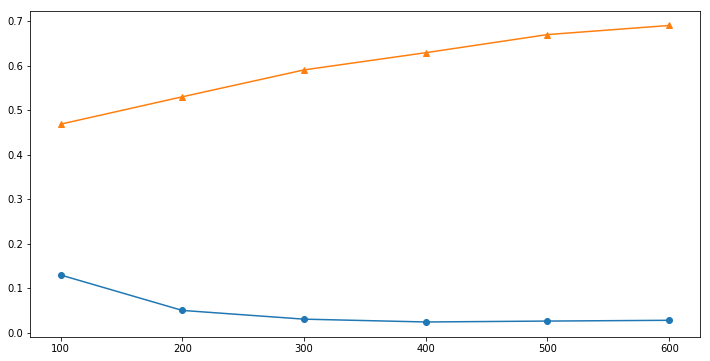

In [60]:
fig,ax=plt.subplots(1,1,figsize=(12,6))
plt.plot(epochs, training_loss, marker = "o")
plt.plot(epochs, testing_loss, marker = "^")

In [61]:
# determine the number of epochs
training_loss=list()
testing_loss=list()

training_accuracy=list()
testing_accuracy=list()

epochs = range(10,100,20) # jump 50 range 100 to 600

Lambda = 1e-6
dropout = 0.2
lr = 1e-3
activation = 'relu'
model = cr_model(Lambda,dropout,lr,activation)

for epoch in epochs: 
    model.fit(xs_train, y_train,epochs=epoch,batch_size=1000,verbose= 1) # try for various epochs
    train_score = model.evaluate(xs_train, y_train, verbose=0) # train_score
    test_score = model.evaluate(xs_test,y_test)#test_score
    
    training_loss.append(train_score[0]) # append training loss
    testing_loss.append(test_score[0]) # append testing loss    
    
    training_accuracy.append(train_score[1]) # append training accuracy
    testing_accuracy.append(test_score[1]) # append testing accuracy

Epoch 1/10
42/42 [==============================] - 2s 29ms/step - loss: 1.9983 - accuracy: 0.3220
Epoch 2/10
42/42 [==============================] - 1s 26ms/step - loss: 1.2610 - accuracy: 0.6072
Epoch 3/10
42/42 [==============================] - 1s 26ms/step - loss: 1.0304 - accuracy: 0.6828
Epoch 4/10
42/42 [==============================] - 1s 26ms/step - loss: 0.9158 - accuracy: 0.7178
Epoch 5/10
42/42 [==============================] - 1s 28ms/step - loss: 0.8366 - accuracy: 0.7423
Epoch 6/10
42/42 [==============================] - 1s 27ms/step - loss: 0.7880 - accuracy: 0.7557
Epoch 7/10
42/42 [==============================] - 1s 26ms/step - loss: 0.7417 - accuracy: 0.7709
Epoch 8/10
42/42 [==============================] - 1s 26ms/step - loss: 0.7070 - accuracy: 0.7805
Epoch 9/10
42/42 [==============================] - 1s 26ms/step - loss: 0.6696 - accuracy: 0.7928
Epoch 10/10
563/563 [==============================] - 1s 2ms/step - loss: 0.5919 - accuracy: 0.8243
Epoch 1/

42/42 [==============================] - 1s 28ms/step - loss: 0.2781 - accuracy: 0.9104
Epoch 42/50
42/42 [==============================] - 1s 24ms/step - loss: 0.2731 - accuracy: 0.9111
Epoch 43/50
42/42 [==============================] - 1s 28ms/step - loss: 0.2711 - accuracy: 0.9133
Epoch 44/50
42/42 [==============================] - 1s 26ms/step - loss: 0.2765 - accuracy: 0.9101
Epoch 45/50
42/42 [==============================] - 1s 30ms/step - loss: 0.2735 - accuracy: 0.9115
Epoch 46/50
42/42 [==============================] - 1s 33ms/step - loss: 0.2712 - accuracy: 0.9104 0s - loss: 0
Epoch 47/50
42/42 [==============================] - 1s 33ms/step - loss: 0.2664 - accuracy: 0.9153
Epoch 48/50
42/42 [==============================] - 1s 33ms/step - loss: 0.2682 - accuracy: 0.9131
Epoch 49/50
42/42 [==============================] - 1s 34ms/step - loss: 0.2621 - accuracy: 0.9144
Epoch 50/50
563/563 [==============================] - 1s 2ms/step - loss: 0.4664 - accuracy: 0.872

563/563 [==============================] - 1s 2ms/step - loss: 0.5040 - accuracy: 0.8748
Epoch 1/90
42/42 [==============================] - 1s 27ms/step - loss: 0.1981 - accuracy: 0.9357
Epoch 2/90
42/42 [==============================] - 1s 28ms/step - loss: 0.1977 - accuracy: 0.9358
Epoch 3/90
42/42 [==============================] - 1s 27ms/step - loss: 0.2032 - accuracy: 0.9348
Epoch 4/90
42/42 [==============================] - 1s 29ms/step - loss: 0.1956 - accuracy: 0.9363
Epoch 5/90
42/42 [==============================] - 1s 30ms/step - loss: 0.2009 - accuracy: 0.9350
Epoch 6/90
42/42 [==============================] - 1s 28ms/step - loss: 0.1973 - accuracy: 0.9355
Epoch 7/90
42/42 [==============================] - 1s 28ms/step - loss: 0.1925 - accuracy: 0.9364
Epoch 8/90
42/42 [==============================] - 1s 25ms/step - loss: 0.1947 - accuracy: 0.9365
Epoch 9/90
42/42 [==============================] - 1s 28ms/step - loss: 0.1970 - accuracy: 0.9347
Epoch 10/90
42/42 [=

42/42 [==============================] - 1s 31ms/step - loss: 0.1684 - accuracy: 0.9448
Epoch 83/90
42/42 [==============================] - 1s 30ms/step - loss: 0.1620 - accuracy: 0.9470
Epoch 84/90
42/42 [==============================] - 1s 29ms/step - loss: 0.1638 - accuracy: 0.9460
Epoch 85/90
42/42 [==============================] - 1s 29ms/step - loss: 0.1669 - accuracy: 0.9466
Epoch 86/90
42/42 [==============================] - 1s 29ms/step - loss: 0.1598 - accuracy: 0.9488
Epoch 87/90
42/42 [==============================] - 1s 33ms/step - loss: 0.1623 - accuracy: 0.9483
Epoch 88/90
42/42 [==============================] - 1s 28ms/step - loss: 0.1651 - accuracy: 0.9463
Epoch 89/90
42/42 [==============================] - 1s 28ms/step - loss: 0.1642 - accuracy: 0.9459
Epoch 90/90
563/563 [==============================] - 1s 2ms/step - loss: 0.5342 - accuracy: 0.8765


Text(0, 0.5, 'Loss')

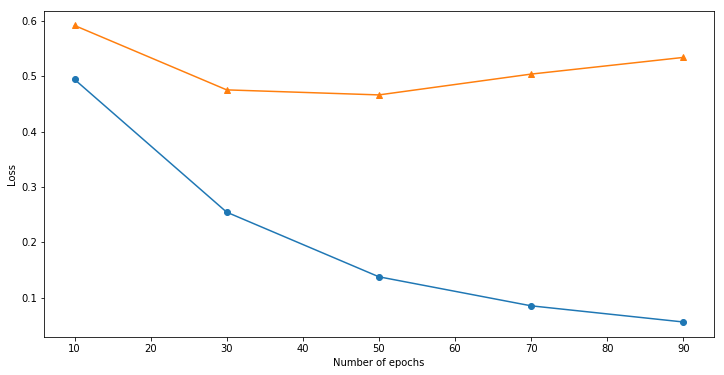

In [64]:
fig,ax=plt.subplots(1,1,figsize=(12,6))
plt.plot(epochs, training_loss, marker = "o")
plt.plot(epochs, testing_loss, marker = "^")
plt.xlabel('Number of epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

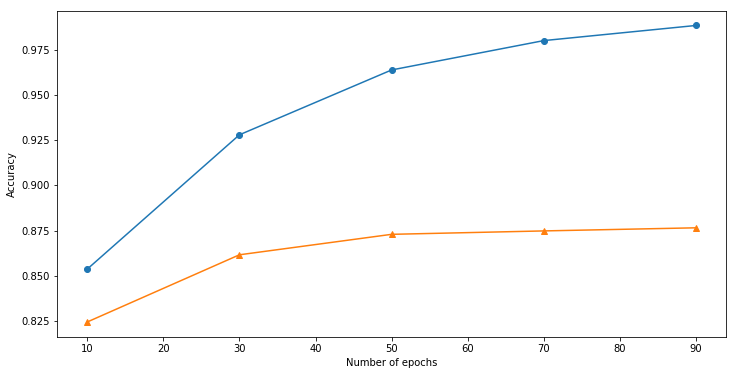

In [65]:
fig,ax=plt.subplots(1,1,figsize=(12,6))
plt.plot(epochs,training_accuracy , marker = "o")
plt.plot(epochs,testing_accuracy, marker = "^")
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')

##### Loss in validation set goes down till epoch =30 and starts increasing again from epoch =50. similary accuracy increases till epoch =30 and there is only very minimal improvement after that

In [68]:
#### check prediction and labels
Lambda = 1e-6
dropout = 0.2
lr = 1e-3
activation = 'relu'
model = cr_model(Lambda,dropout,lr,activation)
model.fit(xs_train, y_train,epochs=30,batch_size=1000,verbose= 1) # try for various epochs
y_pred = model.predict(xs_test)#test_labels

Epoch 1/30
42/42 [==============================] - 2s 25ms/step - loss: 1.9694 - accuracy: 0.3267
Epoch 2/30
42/42 [==============================] - 1s 25ms/step - loss: 1.2588 - accuracy: 0.6030
Epoch 3/30
42/42 [==============================] - 1s 25ms/step - loss: 1.0291 - accuracy: 0.6827
Epoch 4/30
42/42 [==============================] - 1s 24ms/step - loss: 0.9126 - accuracy: 0.7162
Epoch 5/30
42/42 [==============================] - 1s 26ms/step - loss: 0.8252 - accuracy: 0.7440
Epoch 6/30
42/42 [==============================] - 1s 25ms/step - loss: 0.7760 - accuracy: 0.7610
Epoch 7/30
42/42 [==============================] - 1s 28ms/step - loss: 0.7298 - accuracy: 0.7741
Epoch 8/30
42/42 [==============================] - 1s 26ms/step - loss: 0.6923 - accuracy: 0.7855
Epoch 9/30
42/42 [==============================] - 1s 25ms/step - loss: 0.6626 - accuracy: 0.7937
Epoch 10/30
42/42 [==============================] - 1s 29ms/step - loss: 0.6423 - accuracy: 0.8008
Epoch 11/

label for each of the below image: 0
label for each of the below image: 7
label for each of the below image: 2
label for each of the below image: 9
label for each of the below image: 0
label for each of the below image: 9
label for each of the below image: 1
label for each of the below image: 8
label for each of the below image: 1
label for each of the below image: 4


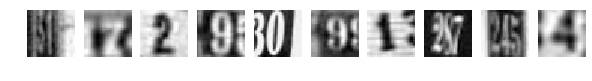

In [72]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_test[i], cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % np.argmax(y_pred[i]))
plt.show()

##### Most of the images have been predicted correctly

In [81]:
y_pred_labels = np.argmax(y_pred,axis=1)

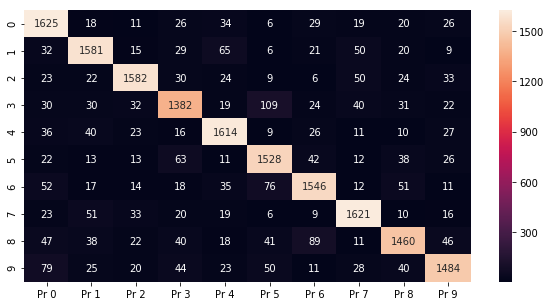

In [83]:
lab= list(range(0,10))
plab=["Pr "+str(s) for s in lab]
cm=confusion_matrix(y_test,y_pred_labels,labels=lab)
df_cm = pd.DataFrame(cm, index = [i for i in lab],
                  columns = [i for i in plab])
plt.figure(figsize = (10,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

##### Accuracy looks evenly distributed across all class labels

In [86]:
# Pickling the final model
model_file = 'classification_model.sav'
model.save(model_file)

# load the model 
model_clf = load_model('classification_model.sav')
y_pred_loaded = model_clf.predict(xs_test)
y_pred_loaded_labels = np.argmax(y_pred_loaded,axis=1)
(y_pred_labels-y_pred_loaded_labels).sum()

INFO:tensorflow:Assets written to: classification_model.sav\assets


0

##### values match

##### Summary:

1. Created model with weight initialization, batch normalisation and dropout
2. Applied parameter tuning to fine tune the model.
3. Determined epochs that is good enough to give us better accuracy in validation dataset
4. Explored the predicted test results using images and confusion matrix
5. Model seems to perform well in validation dataset.
6. Save the model and reuse for later use